GITHUB

In [318]:
import os
import pickle 

import geopandas as gpd

import matplotlib.pyplot as plt
import geoplot as gplt

import pandas as pd 
import numpy as np
import pysal as ps
from pysal.lib import weights

import seaborn as sns

import mapclassify as mc

from scipy.spatial import cKDTree

import fiona

### Freguesias do Distrito de Aveiro

In [319]:
CAOP2020 = gpd.read_file(r"C:\Users\ritam\OneDrive - Universidade de Aveiro\Dissertacao\DISSERTACAO_WORK\DADOS_IN\DADOS_IN_SHAPEFILES\CAOP2021\Cont_AAD_CAOP2021.shp")
CAOP2020_FREG = CAOP2020.dissolve(by = ["Dicofre", "Freguesia","Concelho"] )
CAOP2020_FREG = CAOP2020_FREG.reset_index()
CAOP2020_FREG["DTMN21"] = CAOP2020_FREG.Dicofre.str.slice(0,4)
CAOP2020_FREG[:3]

,Dicofre,Freguesia,Concelho,geometry,Distrito,TAA,Area_T_ha,Area_EA_ha,Des_Simpli,DTMN21
0,010103,Aguada de Cima,Águeda,"POLYGON ((-22457.151 97217.803, -22423.821 971...",Aveiro,ÁREA PRINCIPAL,2839.31,2839.31,Aguada de Cima,0101
1,010109,Fermentelos,Águeda,"POLYGON ((-31260.894 100010.838, -31262.804 10...",Aveiro,ÁREA PRINCIPAL,858.20,858.20,Fermentelos,0101
2,010112,Macinhata do Vouga,Águeda,"POLYGON ((-20410.354 112211.523, -20409.234 11...",Aveiro,ÁREA PRINCIPAL,3195.44,3195.44,Macinhata do Vouga,0101


### Informação adicional das freguesias do Distrito

In [320]:
CAOP2020_FREG_aditData = pd.read_excel(r"C:\Users\ritam\OneDrive - Universidade de Aveiro\Dissertacao\DISSERTACAO_WORK\DADOS_IN\DADOS_IN_SHAPEFILES\CAOP2021\CAOP2021_infoAdicional.xlsx", sheet_name="Areas_Freguesias_CAOP2021", dtype={"NUTSI_COD": str, "NUTSII_COD": str, "NUTSIII_COD": str,} )
CAOP2020_FREG_aditData[:3]

,DICOFRE,NUTSI_DSG,NUTSI_COD,NUTSII_DSG,NUTSII_COD,NUTSIII_DSG,NUTSIII_COD,DISTRITO_ILHA_DSG,CONCELHO_DSG,FREGUESIA_DSG,AREA_2021_ha,AREA_2021_km2
0,010103,Continente,1,Centro,16,Região de Aveiro,16D,Aveiro,Águeda,Aguada de Cima,2839.31,28.39
1,010109,Continente,1,Centro,16,Região de Aveiro,16D,Aveiro,Águeda,Fermentelos,858.20,8.58
2,010112,Continente,1,Centro,16,Região de Aveiro,16D,Aveiro,Águeda,Macinhata do Vouga,3195.44,31.95


In [321]:
CAOP2020_FREG = pd.merge(CAOP2020_FREG, CAOP2020_FREG_aditData[["DICOFRE","NUTSIII_DSG","NUTSIII_COD"	]], how='left', left_on = 'Dicofre', right_on = 'DICOFRE')

### Mapa da Região de Aveiro

<AxesSubplot:>

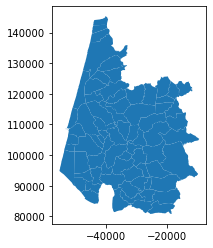

In [322]:
CasoEstudo_DistritoAVR = ['16D']
CAOP2020_DistritoAVR_FREG = CAOP2020_FREG[CAOP2020_FREG['NUTSIII_COD'].isin(CasoEstudo_DistritoAVR)]
CAOP2020_DistritoAVR_FREG.plot()

In [323]:
CAOP2020_MUNI = CAOP2020_FREG[["DTMN21","Concelho","NUTSIII_DSG", "NUTSIII_COD", "geometry"]].dissolve(by = ["DTMN21","Concelho"] )
CAOP2020_MUNI = CAOP2020_MUNI.reset_index()
CAOP2020_MUNI[:3]

,DTMN21,Concelho,geometry,NUTSIII_DSG,NUTSIII_COD
0,0101,Águeda,"POLYGON ((-25647.507 93242.339, -25739.783 931...",Região de Aveiro,16D
1,0102,Albergaria-a-Velha,"POLYGON ((-29040.418 108964.754, -29041.338 10...",Região de Aveiro,16D
2,0103,Anadia,"POLYGON ((-17967.760 83828.847, -17911.070 838...",Região de Aveiro,16D


In [324]:
CAOP2020_MUNI = CAOP2020_MUNI[CAOP2020_MUNI['NUTSIII_COD'].isin(CasoEstudo_DistritoAVR)]

<AxesSubplot:>

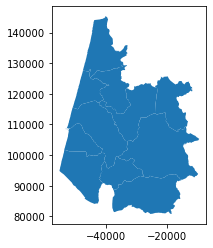

In [325]:
CAOP2020_MUNI.plot()

### Shape

<AxesSubplot:>

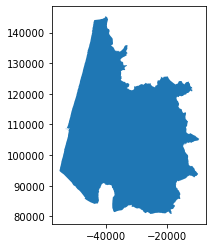

In [326]:
type(CAOP2020_DistritoAVR_FREG[["geometry"]].unary_union)
CS_DistritoAVR = gpd.GeoDataFrame(index=[0], crs='epsg:3763', geometry = [CAOP2020_DistritoAVR_FREG[["geometry"]].unary_union] )
CS_DistritoAVR.plot()

### Dados das subsecções do distrito de Aveiro- INE

In [327]:
BGRI2011 = gpd.read_file(r"C:\Users\ritam\OneDrive - Universidade de Aveiro\Dissertacao\DISSERTACAO_WORK\DADOS_IN\DADOS_IN_SHAPEFILES\INE_BGRI_CENSOS2011", layer="BGRI11_CONT_CLEAN")
BGRI2011[:3]

,DTMN11,BGRI11,LUG11,LUG11DESIG,DICOFRE,AREASUBSEC,Shape_Leng,Shape_Area,geometry
0,0407,04070200104,013810,Abreiro,040702,114463.564987,2127.892679,114463.564987,"POLYGON ((70385.364 187253.985, 70468.973 1871..."
1,0407,04070200106,013810,Abreiro,040702,54224.329878,1129.357468,54224.329878,"POLYGON ((70345.582 187206.405, 70365.695 1871..."
2,0407,04070200101,013811,Milhais,040702,66225.007920,1585.958933,66225.007920,"POLYGON ((67451.278 188137.559, 67436.483 1881..."


In [328]:
BGRI2011_CAOP2021_MUNI = pd.merge(BGRI2011, CAOP2020_MUNI[["DTMN21","Concelho","NUTSIII_DSG", "NUTSIII_COD"]], how='left', left_on = 'DTMN11', right_on = 'DTMN21')
BGRI2011_CAOP2021_MUNI[:3]

,DTMN11,BGRI11,LUG11,LUG11DESIG,DICOFRE,AREASUBSEC,Shape_Leng,Shape_Area,geometry,DTMN21,Concelho,NUTSIII_DSG,NUTSIII_COD
0,0407,04070200104,013810,Abreiro,040702,114463.564987,2127.892679,114463.564987,"POLYGON ((70385.364 187253.985, 70468.973 1871...",NaN,NaN,NaN,NaN
1,0407,04070200106,013810,Abreiro,040702,54224.329878,1129.357468,54224.329878,"POLYGON ((70345.582 187206.405, 70365.695 1871...",NaN,NaN,NaN,NaN
2,0407,04070200101,013811,Milhais,040702,66225.007920,1585.958933,66225.007920,"POLYGON ((67451.278 188137.559, 67436.483 1881...",NaN,NaN,NaN,NaN


In [329]:
MUNIlist_RegiaoAveiro = CAOP2020_DistritoAVR_FREG.Concelho.unique()
MUNIlist_RegiaoAveiro

array(['Águeda', 'Albergaria-a-Velha', 'Anadia', 'Aveiro', 'Estarreja',
       'Ílhavo', 'Murtosa', 'Oliveira do Bairro', 'Ovar',
       'Sever do Vouga', 'Vagos'], dtype=object)

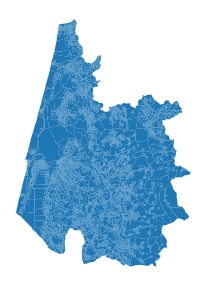

In [330]:
BGRI2011_CAOP2021_CS_DistritoAVR = BGRI2011_CAOP2021_MUNI[BGRI2011_CAOP2021_MUNI['Concelho'].isin(MUNIlist_RegiaoAveiro)]
BGRI2011_CAOP2021_CS_DistritoAVR = BGRI2011_CAOP2021_CS_DistritoAVR.reset_index(drop=True)
figura, ax = plt.subplots(1, figsize=(5,5))
BGRI2011_CAOP2021_CS_DistritoAVR.plot(ax=ax)
ax.set_axis_off()

##### Tirar zonas residuais (Sabemos que todas as zonas residuais têm LUG11=999999)

In [331]:
BGRI2011_CAOP2021_CS_DistritoAVR[BGRI2011_CAOP2021_CS_DistritoAVR["LUG11"] == "999999"]

,DTMN11,BGRI11,LUG11,LUG11DESIG,DICOFRE,AREASUBSEC,Shape_Leng,Shape_Area,geometry,DTMN21,Concelho,NUTSIII_DSG,NUTSIII_COD
13,0118,01180400105,999999,Residual,011804,2.501288e+06,6524.359419,2.501288e+06,"POLYGON ((-52611.966 101462.358, -52088.565 10...",0118,Vagos,Região de Aveiro,16D
39,0118,01180100235,999999,Residual,011801,3.117062e+06,8496.093166,3.117062e+06,"POLYGON ((-48654.166 88411.649, -48655.926 884...",0118,Vagos,Região de Aveiro,16D
41,0101,01010800142,999999,Residual,010108,2.036249e+06,11912.192628,2.036249e+06,"POLYGON ((-29350.788 101241.725, -29377.319 10...",0101,Águeda,Região de Aveiro,16D
44,0101,01010800329,999999,Residual,010108,1.608239e+06,9301.001058,1.608239e+06,"POLYGON ((-29028.213 100052.439, -29028.130 99...",0101,Águeda,Região de Aveiro,16D
119,0108,01080500419,999999,Residual,010805,6.305713e+05,3542.705246,6.305713e+05,"POLYGON ((-39939.470 124037.652, -39898.556 12...",0108,Estarreja,Região de Aveiro,16D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9506,0115,01150600321,999999,Residual,011506,5.971763e+04,1138.188101,5.971763e+04,"POLYGON ((-34782.540 133543.242, -34776.479 13...",0115,Ovar,Região de Aveiro,16D
9515,0103,01030200120,999999,Residual,010302,5.827562e+05,4907.540014,5.827562e+05,"POLYGON ((-32519.214 88213.835, -32507.512 882...",0103,Anadia,Região de Aveiro,16D
9516,0101,01010100121,999999,Residual,010101,1.408193e+07,24192.801945,1.408193e+07,"POLYGON ((-12301.574 96359.870, -12315.502 963...",0101,Águeda,Região de Aveiro,16D
9519,0101,01010100122,999999,Residual,010101,1.378318e+07,30377.406258,1.378318e+07,"POLYGON ((-16308.131 101162.236, -16308.134 10...",0101,Águeda,Região de Aveiro,16D


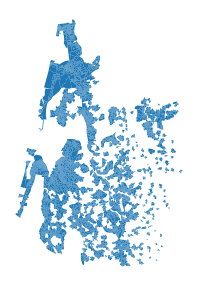

In [332]:
BGRI2011withoutRES_CAOP2021_CS_DistritoAVR = BGRI2011_CAOP2021_CS_DistritoAVR[BGRI2011_CAOP2021_CS_DistritoAVR["LUG11"] != "999999"]
BGRI2011withoutRES_CAOP2021_CS_DistritoAVR = BGRI2011withoutRES_CAOP2021_CS_DistritoAVR.reset_index(drop=True)
figura, ax = plt.subplots(1, figsize=(5,5))
BGRI2011withoutRES_CAOP2021_CS_DistritoAVR.plot(ax=ax)
ax.set_axis_off()

<AxesSubplot:>

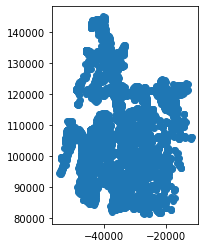

In [333]:
BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_points  = BGRI2011withoutRES_CAOP2021_CS_DistritoAVR.copy()
BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_points['geometry']=BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_points['geometry'].centroid
BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_points.plot()

### Georeferenciar instituições de apoio domiciliário

In [334]:
inst_ApoioDomi_db = pd.read_csv(r"C:\Users\ritam\OneDrive - Universidade de Aveiro\Dissertacao\DISSERTACAO_WORK\DADOS_PROCESSADOS\TABELAS\db_carta_social_apoiodomiciliario.csv", sep=";")
inst_ApoioDomi_db = inst_ApoioDomi_db.reset_index()
inst_ApoioDomi_db = inst_ApoioDomi_db.rename(columns={"index": "InstAD_ID"})
inst_ApoioDomi_db

,InstAD_ID,Instituicao,Morada_latitude,Morada_longitude,Capacidades,Utentes
0,0,A NOSSA CASA,40.95560,-8.63257,24,12
1,1,A.M.A.R.,40.65709,-8.45119,20,20
2,2,APOIO DOMICILIARIO VITALIVING,40.64633,-8.64221,40,31
3,3,ASSOCIACAO BOA-HORA,40.54044,-8.75289,30,19
4,4,ASSOCIACAO DE APOIO SOCIAL DE SANFINS,40.92995,-8.52557,20,20
...,...,...,...,...,...,...
169,169,SCM AROUCA - CENTRO DE DIA E SAD DE TROPEÇO,40.92622,-8.29163,15,0
170,170,GUILMÉDICA - PRESTAÇÃO DE SERVIÇOS À ACTIVIDAD...,40.75569,-8.57396,40,20
171,171,TAREFAS CÚMPLICES SAD,40.84068,-8.39703,40,0
172,172,BABYDOSO,40.64172,-8.64856,40,18


<AxesSubplot:>

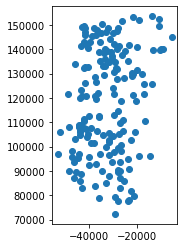

In [335]:
inst_ApoioDomi_gdb = gpd.GeoDataFrame(inst_ApoioDomi_db, geometry=gpd.points_from_xy(inst_ApoioDomi_db.Morada_longitude, inst_ApoioDomi_db.Morada_latitude))
inst_ApoioDomi_gdb= inst_ApoioDomi_gdb.set_crs("EPSG:4326")
inst_ApoioDomi_gdb= inst_ApoioDomi_gdb.to_crs("EPSG:3763")
inst_ApoioDomi_gdb.plot()

##### Retirar as instituições que estão fora da Região

<AxesSubplot:>

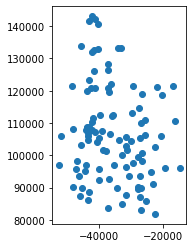

In [336]:
inst_ApoioDomi_CS_DistritoAVR_gdb = inst_ApoioDomi_gdb.overlay(CS_DistritoAVR, how='intersection')
inst_ApoioDomi_CS_DistritoAVR_gdb.plot()

### População com dificuldades

In [337]:
BGRI11_POP11_dificuldades = pd.read_csv(r"C:\Users\ritam\OneDrive - Universidade de Aveiro\Dissertacao\DISSERTACAO_WORK\DADOS_IN\DADOS_IN_TABELAS\P527781517_dados.csv", sep=";", dtype={"MUNICIPIO": str, "FREGUESIA": str, "SUBSECCAO": str,} )
print(BGRI11_POP11_dificuldades.columns)
BGRI11_POP11_dificuldades[:3]

Index(['MUNICIPIO', 'Municipio Dsg', 'FREGUESIA', 'FREGUESIA DSG', 'SUBSECCAO',
       'Dif_Ver_Total', 'Dif_Ver_NaoTemOuPouca', 'Dif_Ver_TemMuita',
       'Dif_Ver_NaoConsegueSozinho', 'Dif_Ouvir_Total',
       'Dif_Ouvir_NaoTemOuPouca', 'Dif_Ouvir_TemMuita',
       'Dif_Ouvir_NaoConsegueSozinho', 'Dif_AndarSubirDegraus_Total',
       'Dif_AndarSubirDegraus_NaoTemOuPouca', 'Dif_AndarSubirDegraus_TemMuita',
       'Dif_AndarSubirDegraus_NaoConsegueSozinho', 'Dif_MemoriaConcent_Total',
       'Dif_MemoriaConcent_NaoTemOuPouca', 'Dif_MemoriaConcent_TemMuita',
       'Dif_MemoriaConcent_NaoConsegueSozinho', 'Dif_TomarBanhoVestir_Total',
       'Dif_TomarBanhoVestir_NaoTemOuPouca', 'Dif_TomarBanhoVestir_TemMuita',
       'Dif_TomarBanhoVestir_NaoConsegueSozinho', 'Dif_Memoria_Total',
       'Dif_Memoria_NaoTemOuPouca', 'Dif_Memoria_TemMuita',
       'Dif_Memoria_NaoConsegueSozinho'],
      dtype='object')


,MUNICIPIO,Municipio Dsg,FREGUESIA,FREGUESIA DSG,SUBSECCAO,Dif_Ver_Total,Dif_Ver_NaoTemOuPouca,Dif_Ver_TemMuita,Dif_Ver_NaoConsegueSozinho,Dif_Ouvir_Total,...,Dif_MemoriaConcent_TemMuita,Dif_MemoriaConcent_NaoConsegueSozinho,Dif_TomarBanhoVestir_Total,Dif_TomarBanhoVestir_NaoTemOuPouca,Dif_TomarBanhoVestir_TemMuita,Dif_TomarBanhoVestir_NaoConsegueSozinho,Dif_Memoria_Total,Dif_Memoria_NaoTemOuPouca,Dif_Memoria_TemMuita,Dif_Memoria_NaoConsegueSozinho
0,0101,Águeda,010101,Agadão,01010100101,8,7,1,0,8,...,0,0,8,8,0,0,8,8,0,0
1,0101,Águeda,010101,Agadão,01010100102,19,18,1,0,19,...,1,0,19,18,1,0,19,18,1,0
2,0101,Águeda,010101,Agadão,01010100103,18,16,2,0,18,...,2,0,18,16,1,1,18,16,1,1


In [338]:
BGRI11_POP11_dificuldades["Dificuldades_Select"] = BGRI11_POP11_dificuldades.Dif_Ver_NaoConsegueSozinho + BGRI11_POP11_dificuldades.Dif_Ouvir_NaoConsegueSozinho + BGRI11_POP11_dificuldades.Dif_AndarSubirDegraus_NaoConsegueSozinho + BGRI11_POP11_dificuldades.Dif_MemoriaConcent_NaoConsegueSozinho + BGRI11_POP11_dificuldades.Dif_TomarBanhoVestir_NaoConsegueSozinho + BGRI11_POP11_dificuldades.Dif_Memoria_NaoConsegueSozinho

In [339]:
BGRI11_POP11_dif = BGRI11_POP11_dificuldades[["SUBSECCAO","Dificuldades_Select"]]
BGRI11_POP11_dif[:3]

,SUBSECCAO,Dificuldades_Select
0,01010100101,0
1,01010100102,0
2,01010100103,3


In [340]:
CS_DistritoAVR_BGRI11_POP11_dif = pd.merge(BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_points[['BGRI11']], BGRI11_POP11_dif, how='left', left_on = 'BGRI11', right_on = 'SUBSECCAO')
CS_DistritoAVR_BGRI11_POP11_dif.drop(["SUBSECCAO"], axis=1)
CS_DistritoAVR_BGRI11_POP11_dif["Dificuldades_Select_B"] = CS_DistritoAVR_BGRI11_POP11_dif['Dificuldades_Select'].replace(to_replace = 0, value = 1)
CS_DistritoAVR_BGRI11_POP11_dif[:3]

,BGRI11,SUBSECCAO,Dificuldades_Select,Dificuldades_Select_B
0,01020600122,01020600122,0.0,1.0
1,01020600212,01020600212,0.0,1.0
2,01020600225,01020600225,5.0,5.0


### População total residente

In [341]:
BGRI11_sintese_db = pd.read_csv(r"C:\Users\ritam\OneDrive - Universidade de Aveiro\Dissertacao\DISSERTACAO_WORK\DADOS_IN\DADOS_IN_TABELAS\BGRI2011_PT.csv", sep=";")  
BGRI11_sintese_db["GEO_COD"] = BGRI11_sintese_db["GEO_COD"].str.replace("'","")
BGRI11_sintese_db["N_INDIVIDUOS_RESIDENT_HM"] = BGRI11_sintese_db["N_INDIVIDUOS_RESIDENT_H"] + BGRI11_sintese_db["N_INDIVIDUOS_RESIDENT_M"]
BGRI11_sintese_db[:3]

,ANO,GEO_COD,GEO_COD_DSG,NIVEL,NIVEL_DSG,N_EDIFICIOS_CLASSICOS,N_EDIFICIOS_CLASSICOS_1OU2,N_EDIFICIOS_CLASSICOS_ISOLADOS,N_EDIFICIOS_CLASSICOS_GEMIN,N_EDIFICIOS_CLASSICOS_EMBANDA,...,N_IND_RESID_EMPREGADOS,N_IND_RESID_PENS_REFORM,N_IND_RESID_SEM_ACT_ECON,N_IND_RESID_EMPREG_SECT_PRIM,N_IND_RESID_EMPREG_SECT_SEQ,N_IND_RESID_EMPREG_SECT_TERC,N_IND_RESID_ESTUD_MUN_RESID,N_IND_RESID_TRAB_MUN_RESID,Unnamed: 127,N_INDIVIDUOS_RESIDENT_HM
0,2011,0101,Águeda,5,Municipio,18572,17839,13481,2274,2084,...,20999,10441,17730,291,10367,10341,7745,17075,NaN,47729
1,2011,010101,Agadão,6,Freguesia,204,204,197,7,0,...,131,115,190,12,71,48,52,113,NaN,373
2,2011,010101001,,7,Secção,204,204,197,7,0,...,131,115,190,12,71,48,52,113,NaN,373


In [342]:
CS_DistritoAVR_BGRI11_POP11_total = pd.merge(BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_points[['BGRI11']], BGRI11_sintese_db[['GEO_COD', "N_INDIVIDUOS_RESIDENT_HM"]], how='left', left_on = 'BGRI11', right_on = 'GEO_COD')

### População com mais de 65 anos

In [343]:
CS_DistritoAVR_BGRI11_POP11_mais65= pd.merge(BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_points[['BGRI11']], BGRI11_sintese_db[['GEO_COD', "N_INDIVIDUOS_RESIDENT_65"]], how='left', left_on = 'BGRI11', right_on = 'GEO_COD')


### Candidatos a pontos- REDE

In [344]:
from shapely import geometry

In [345]:
# Get the extent of the shapefile
total_bounds = CS_DistritoAVR.total_bounds
 
# Get minX, minY, maxX, maxY
minX, minY, maxX, maxY = total_bounds

In [346]:
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np

width = 2000
height = 2000
rows = int(np.ceil((maxY-minY) /  height))
cols = int(np.ceil((maxX-minX) / width))
XleftOrigin = minX
XrightOrigin = minX + width
YtopOrigin = maxY
YbottomOrigin = maxY- height

polygons = []
for i in range(cols):
    Ytop = YtopOrigin
    Ybottom =YbottomOrigin
    for j in range(rows):
        polygons.append(Polygon([(XleftOrigin, Ytop), (XrightOrigin, Ytop), (XrightOrigin, Ybottom), (XleftOrigin, Ybottom)])) 
        Ytop = Ytop - height
        Ybottom = Ybottom - height
    XleftOrigin = XleftOrigin + width
    XrightOrigin = XrightOrigin + width

grid = gpd.GeoDataFrame(polygons, columns=['geometry']).set_crs('EPSG:3763')
grid.to_file("grid_cs_DistritoAVR_2000.shp")

C:\Users\ritam\anaconda3\envs\tese\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


### Rede dentro do COS

In [347]:
COS2018 = gpd.read_file(r"C:\Users\ritam\OneDrive - Universidade de Aveiro\Dissertacao\DISSERTACAO_WORK\DADOS_IN\DADOS_IN_SHAPEFILES\COS2018v2-shp\COS2018v2.shp")
COS2018[:3]

,ID,COS18n1_C,COS18n1_L,COS18n2_C,COS18n2_L,COS18n3_C,COS18n3_L,COS18n4_C,COS18n4_L,Area_ha,geometry
0,1,1,Territórios artificializados,1.1,Tecido edificado,1.1.1,Tecido edificado contínuo,1.1.1.1,Tecido edificado contínuo predominantemente ve...,6.309516,"POLYGON ((25207.049 -293385.504, 25209.111 -29..."
1,2,1,Territórios artificializados,1.1,Tecido edificado,1.1.1,Tecido edificado contínuo,1.1.1.1,Tecido edificado contínuo predominantemente ve...,21.540695,"POLYGON ((17318.840 -292885.360, 17309.820 -29..."
2,3,1,Territórios artificializados,1.1,Tecido edificado,1.1.1,Tecido edificado contínuo,1.1.1.1,Tecido edificado contínuo predominantemente ve...,266.076909,"POLYGON ((17892.211 -292852.192, 17898.220 -29..."


In [348]:
COS2018_Urb = COS2018[COS2018["COS18n1_C"] == "1"]
COS2018_Urb_cs_DistritoAVR = COS2018_Urb.overlay(CS_DistritoAVR, how='intersection')
COS2018_Urb_cs_DistritoAVR[:3]

,ID,COS18n1_C,COS18n1_L,COS18n2_C,COS18n2_L,COS18n3_C,COS18n3_L,COS18n4_C,COS18n4_L,Area_ha,geometry
0,1013,1,Territórios artificializados,1.1,Tecido edificado,1.1.1,Tecido edificado contínuo,1.1.1.1,Tecido edificado contínuo predominantemente ve...,2.462001,"POLYGON ((-28005.870 84548.140, -28041.470 845..."
1,1014,1,Territórios artificializados,1.1,Tecido edificado,1.1.1,Tecido edificado contínuo,1.1.1.1,Tecido edificado contínuo predominantemente ve...,1.365276,"POLYGON ((-26123.010 84835.980, -26112.660 848..."
2,1015,1,Territórios artificializados,1.1,Tecido edificado,1.1.1,Tecido edificado contínuo,1.1.1.1,Tecido edificado contínuo predominantemente ve...,10.295657,"POLYGON ((-25497.390 86119.890, -25488.017 861..."


In [349]:
grid_COS2018_Urb_cs_DistritoAVR = grid[grid.intersects(COS2018_Urb_cs_DistritoAVR.unary_union)]
grid_COS2018_Urb_cs_DistritoAVR = grid_COS2018_Urb_cs_DistritoAVR.reset_index(drop=True)
grid_COS2018_Urb_cs_DistritoAVR_points  = grid_COS2018_Urb_cs_DistritoAVR.copy()
grid_COS2018_Urb_cs_DistritoAVR_points['geometry']=grid_COS2018_Urb_cs_DistritoAVR_points['geometry'].centroid

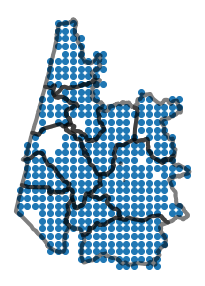

In [350]:
figura, ax = plt.subplots(1, figsize=(5,5))
grid_COS2018_Urb_cs_DistritoAVR_points.plot(ax=ax)
CAOP2020_MUNI.plot(ax=ax, color='None', edgecolor='black', linewidth=4,
                            alpha = 0.5)
ax.set_axis_off()

### Destination Points GRID- LOCAIS CANDIDATOS

In [351]:
grid_COS2018_Urb_cs_DistritoAVR_points_WGS84 = grid_COS2018_Urb_cs_DistritoAVR_points.copy()
grid_COS2018_Urb_cs_DistritoAVR_points_WGS84 = grid_COS2018_Urb_cs_DistritoAVR_points_WGS84.to_crs("EPSG:4326")
grid_COS2018_Urb_cs_DistritoAVR_points_WGS84['lon'] = grid_COS2018_Urb_cs_DistritoAVR_points_WGS84['geometry'].x
grid_COS2018_Urb_cs_DistritoAVR_points_WGS84['lat'] = grid_COS2018_Urb_cs_DistritoAVR_points_WGS84['geometry'].y
grid_COS2018_Urb_cs_DistritoAVR_points_WGS84[:3]

,geometry,lon,lat
0,POINT (-8.77270 40.57017),-8.772702,40.570170
1,POINT (-8.77253 40.55216),-8.772531,40.552160
2,POINT (-8.77236 40.53415),-8.772359,40.534151


In [352]:
grid_COS2018_Urb_cs_DistritoAVR_points_WGS84_coordinates = grid_COS2018_Urb_cs_DistritoAVR_points_WGS84[["lon", "lat"]].to_records(index=False)
grid_COS2018_Urb_cs_DistritoAVR_points_WGS84_coordinates[:3]

rec.array([(-8.7727021 , 40.5701697 ), (-8.77253071, 40.55216017),
           (-8.77235947, 40.5341506 )],
          dtype=[('lon', '<f8'), ('lat', '<f8')])

In [353]:
destinations_location_list_grid =  grid_COS2018_Urb_cs_DistritoAVR_points_WGS84[["lon", "lat"]].values.tolist()
len(destinations_location_list_grid)

432

### Demand Points- População do INE

In [354]:
BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_WGS84 = BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_points.copy()
BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_WGS84 = BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_WGS84.to_crs("EPSG:4326")
BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_WGS84['lon'] = BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_WGS84['geometry'].x
BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_WGS84['lat'] = BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_WGS84['geometry'].y
BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_WGS84[:3]

,DTMN11,BGRI11,LUG11,LUG11DESIG,DICOFRE,AREASUBSEC,Shape_Leng,Shape_Area,geometry,DTMN21,Concelho,NUTSIII_DSG,NUTSIII_COD,lon,lat
0,0102,01020600122,014598,Alto dos Barreiros,010206,32732.593515,1072.979271,32732.593515,POINT (-8.45184 40.74049),0102,Albergaria-a-Velha,Região de Aveiro,16D,-8.451842,40.740492
1,0102,01020600212,014608,Telhadela,010206,190164.817607,3321.252092,190164.817607,POINT (-8.45349 40.76179),0102,Albergaria-a-Velha,Região de Aveiro,16D,-8.453490,40.761794
2,0102,01020600225,014608,Telhadela,010206,225794.084516,2717.542543,225794.084516,POINT (-8.45071 40.75803),0102,Albergaria-a-Velha,Região de Aveiro,16D,-8.450712,40.758025


In [355]:
demand_location_list =  BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_WGS84[["lon", "lat"]].values.tolist()
len(demand_location_list)

9162

### Destination Points Original

In [356]:
inst_ApoioDomi_CS_DistritoAVR_gdb.crs

<Derived Projected CRS: EPSG:3763>
Name: ETRS89 / Portugal TM06
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Portugal - mainland - onshore.
- bounds: (-9.56, 36.95, -6.19, 42.16)
Coordinate Operation:
- name: Portugual TM06
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [357]:
inst_ApoioDomi_CS_DistritoAVR_gdb_WGS84 = inst_ApoioDomi_CS_DistritoAVR_gdb.copy()
inst_ApoioDomi_CS_DistritoAVR_gdb_WGS84 = inst_ApoioDomi_CS_DistritoAVR_gdb_WGS84.to_crs("EPSG:4326")
inst_ApoioDomi_CS_DistritoAVR_gdb_WGS84['lon'] = inst_ApoioDomi_CS_DistritoAVR_gdb_WGS84['geometry'].x
inst_ApoioDomi_CS_DistritoAVR_gdb_WGS84['lat'] = inst_ApoioDomi_CS_DistritoAVR_gdb_WGS84['geometry'].y
inst_ApoioDomi_CS_DistritoAVR_gdb_WGS84[:3]

,InstAD_ID,Instituicao,Morada_latitude,Morada_longitude,Capacidades,Utentes,geometry,lon,lat
0,0,A NOSSA CASA,40.95560,-8.63257,24,12,POINT (-8.63257 40.95560),-8.63257,40.95560
1,1,A.M.A.R.,40.65709,-8.45119,20,20,POINT (-8.45119 40.65709),-8.45119,40.65709
2,2,APOIO DOMICILIARIO VITALIVING,40.64633,-8.64221,40,31,POINT (-8.64221 40.64633),-8.64221,40.64633


In [358]:
destination_location_list_instAD =  inst_ApoioDomi_CS_DistritoAVR_gdb_WGS84[["lon", "lat"]].values.tolist()
len(destination_location_list_instAD)

103

### OSRM routing BGRI11 to instAD

In [359]:
import routingpy 

In [360]:
from routingpy.routers import get_router_by_name
router = get_router_by_name("ors")(api_key='')
print(router)
routingpy.routers.openrouteservice.ORS
route = router.directions(locations, profile)

NameError: name 'locations' is not defined

In [361]:
api = rp.routers.OSRM(base_url='http://127.0.0.1:5000', timeout=None)

NameError: name 'rp' is not defined

In [ ]:
import routingpy as rp
api = rp.routers.OSRM(base_url='https://routing.openstreetmap.de/routed-bike', timeout=None)

In [ ]:
len(demand_location_list)

In [ ]:
locations = demand_location_list + destination_location_list_instAD
locations[3]

In [ ]:
demand = list(range(0, len(demand_location_list)))
destinations = list(range(len(demand_location_list),len(locations)) )

DistOSMR_cs_DistritoAVR_BGRI2011_to_instAD = api.matrix(locations=locations, profile='car', sources = demand, destinations=destinations)

In [ ]:
DistOSMR_cs_DistritoAVR_BGRI2011_to_instAD_distMatrix = pd.DataFrame(DistOSMR_cs_DistritoAVR_BGRI2011_to_instAD.distances)
DistOSMR_cs_DistritoAVR_BGRI2011_to_instAD_distMatrix[:3]

In [ ]:
CostMatrix_DistOSMR_cs_DistritoAVR_BGRI2011_to_instAD_distMatrix = DistOSMR_cs_DistritoAVR_BGRI2011_to_instAD_distMatrix.to_numpy()

### OSRM routing BGRI11 to GRID

In [ ]:
#Nota: rp é a instância da livraria rountingpy iniciada nas configurações do projeto
# Documentação: https://routingpy.readthedocs.io/en/latest/#osrm
# http://localhost:5000/

import routingpy as rp
api = rp.routers.OSRM(base_url='http://127.0.0.1:5000', timeout=None)

In [ ]:
# Create List of lists
locations = demand_location_list + destinations_location_list_grid
locations[3]

In [ ]:
demand = list(range(0, len(demand_location_list)))
destinations = list(range(len(demand_location_list),len(locations)) )
DistOSMR_cs_DistritoAVR_BGRI2011_to_GRID = api.matrix(locations = locations, profile='car', sources = demand, destinations = destinations)

In [ ]:
DistOSMR_cs_DistritoAVR_BGRI2011_to_GRID_distMatrix = pd.DataFrame(DistOSMR_cs_DistritoAVR_BGRI2011_to_GRID.distances)
DistOSMR_cs_DistritoAVR_BGRI2011_to_GRID_distMatrix[:3]

In [ ]:
CostMatrix_DistOSMR_cs_DistritoAVR_BGRI2011_to_GRID_distMatrix = DistOSMR_cs_DistritoAVR_BGRI2011_to_GRID_distMatrix.to_numpy()

In [362]:
file = open(r'C:\Users\ritam\OneDrive - Universidade de Aveiro\Dissertacao\DISSERTACAO_WORK\DADOS_PROCESSADOS\PIKLE\db_CS_DistritoAVR_part2.pkl', 'rb')

BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_WGS84 = pickle.load(file)

DistOSMR_cs_DistritoAVR_BGRI2011_to_instAD_distMatrix = pickle.load(file)
CostMatrix_DistOSMR_cs_DistritoAVR_BGRI2011_to_instAD_distMatrix = pickle.load(file)

DistOSMR_cs_DistritoAVR_BGRI2011_to_instAD = pickle.load(file)
inst_ApoioDomi_CS_DistritoAVR_gdb_WGS84 = pickle.load(file)

DistOSMR_cs_DistritoAVR_BGRI2011_to_GRID_distMatrix = pickle.load(file)
CostMatrix_DistOSMR_cs_DistritoAVR_BGRI2011_to_GRID_distMatrix = pickle.load(file)

grid_COS2018_Urb_cs_DistritoAVR_points = pickle.load(file)


CS_DistritoAVR_BGRI11_POP11_dif = pickle.load(file)
CS_DistritoAVR_BGRI11_POP11_total = pickle.load(file)
CS_DistritoAVR_BGRI11_POP11_mais65 = pickle.load(file)

file.close() 

#### Merge entre as instituições e a grelha dos pontos candidatos, de forma a calcular a distância

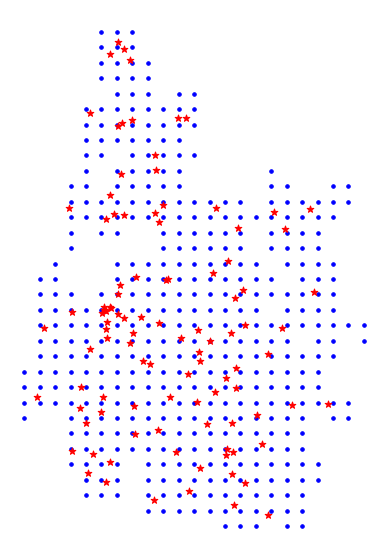

In [363]:
figura, ax = plt.subplots(figsize = (10,10) )
ax.set_aspect('equal')
inst_ApoioDomi_CS_DistritoAVR_gdb.plot(ax=ax,zorder=2, 
                      marker='*', 
                      color='red', 
                      markersize=50)
grid_COS2018_Urb_cs_DistritoAVR_points.plot(ax=ax, zorder=1, 
                             marker='.', 
                      color='blue', 
                      markersize=50)
ax.set_axis_off()

In [364]:
matriz_distancia_grib_inst=inst_ApoioDomi_CS_DistritoAVR_gdb.geometry.apply(lambda g: grid_COS2018_Urb_cs_DistritoAVR_points.geometry.distance(g))

In [365]:
dist_grib_inst=matriz_distancia_grib_inst.idxmin(axis = 1)

In [366]:
option=dist_grib_inst.to_list()

In [367]:
grid_COS2018_Urb_cs_DistritoAVR_points_inst=grid_COS2018_Urb_cs_DistritoAVR_points[grid_COS2018_Urb_cs_DistritoAVR_points.index.isin(option)]

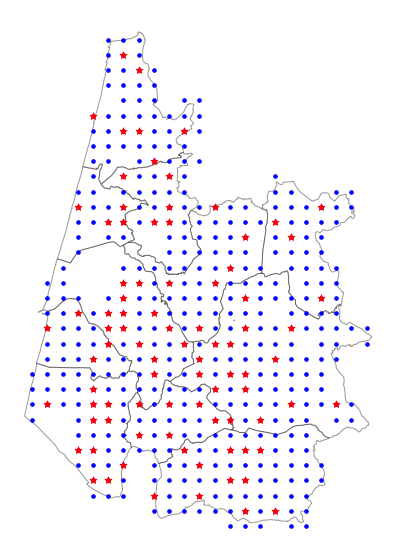

In [368]:
figura, ax = plt.subplots(figsize = (10,10) )
ax.set_aspect('equal')
CAOP2020_MUNI.plot(ax=ax, color='white', edgecolor='black', linewidth=1,
                            alpha = 0.4)
grid_COS2018_Urb_cs_DistritoAVR_points_inst.plot(ax=ax,zorder=2, 
                      marker='*', 
                      color='red', 
                      markersize=50)
grid_COS2018_Urb_cs_DistritoAVR_points.plot(ax=ax, zorder=1, 
                             marker='.', 
                      color='blue', 
                      markersize=50)
ax.set_axis_off()

#### Calcular o total de população em cada município

#### População com dificuldades

In [369]:
Pop_dif =BGRI2011withoutRES_CAOP2021_CS_DistritoAVR.merge(CS_DistritoAVR_BGRI11_POP11_dif, left_on=["BGRI11"], right_on = ['BGRI11'], how = "right" )

In [370]:
Pop_dif['tot_pop_abr_inst'] = Pop_dif.groupby('Concelho')['Dificuldades_Select'].transform(np.sum)

In [371]:
TABLE_POP_DIF= pd.pivot_table(Pop_dif,index=["Concelho"],
               values=["tot_pop_abr_inst"]
               ,fill_value=0)

In [372]:
TABLE_POP_DIF

,tot_pop_abr_inst
Concelho,
Albergaria-a-Velha,1255
Anadia,1788
Aveiro,3183
Estarreja,1664
Murtosa,647
Oliveira do Bairro,1358
Ovar,2445
Sever do Vouga,605
Vagos,1323


#### População com mais de 65 anos 

In [373]:
Pop_mais65 =BGRI2011withoutRES_CAOP2021_CS_DistritoAVR.merge(CS_DistritoAVR_BGRI11_POP11_mais65, left_on=["BGRI11"], right_on = ['BGRI11'], how = "right" )

In [374]:
Pop_mais65['tot_pop_abr_inst'] = Pop_mais65.groupby('Concelho')['N_INDIVIDUOS_RESIDENT_65'].transform(np.sum)

In [375]:
TABLE_POP_MAIS65= pd.pivot_table(Pop_mais65,index=["Concelho"],
               values=["tot_pop_abr_inst"]
               ,fill_value=0)

In [376]:
TABLE_POP_MAIS65

,tot_pop_abr_inst
Concelho,
Albergaria-a-Velha,4525
Anadia,6763
Aveiro,13228
Estarreja,5358
Murtosa,2381
Oliveira do Bairro,4675
Ovar,8791
Sever do Vouga,2826
Vagos,4479


#### População total residente

In [377]:
Pop_total =BGRI2011withoutRES_CAOP2021_CS_DistritoAVR.merge(CS_DistritoAVR_BGRI11_POP11_total, left_on=["BGRI11"], right_on = ['BGRI11'], how = "right" )

In [378]:
Pop_total['tot_pop_abr_inst'] = Pop_total.groupby('Concelho')['N_INDIVIDUOS_RESIDENT_HM'].transform(np.sum)

In [379]:
TABLE_POP_TOTAL= pd.pivot_table(Pop_total,index=["Concelho"],
               values=["tot_pop_abr_inst"]
               ,fill_value=0)

In [380]:
TABLE_POP_TOTAL

,tot_pop_abr_inst
Concelho,
Albergaria-a-Velha,25078
Anadia,28462
Aveiro,78055
Estarreja,26490
Murtosa,10534
Oliveira do Bairro,22531
Ovar,55282
Sever do Vouga,12023
Vagos,22812


### Modelação

#### Cobertura existente (hipotética)

In [381]:
BGRI2011withoutRES_CS_DistritoAVR_descodifica = BGRI2011withoutRES_CAOP2021_CS_DistritoAVR_WGS84['BGRI11']
BGRI2011withoutRES_CS_DistritoAVR_descodifica.shape[0]

9162

In [382]:
cobertura_existente = DistOSMR_cs_DistritoAVR_BGRI2011_to_instAD_distMatrix.idxmin(axis = 1)

In [383]:
cobertura_existente.to_frame()

,0
0,89
1,89
2,89
3,89
4,89
...,...
9157,97
9158,97
9159,97
9160,97


In [384]:
cobertura_existente = pd.read_csv("cobertura_existente_regiaoav.csv", sep=";")

In [385]:
inst_ApoioDomi_CS_DistritoAVR_gdb=inst_ApoioDomi_CS_DistritoAVR_gdb.drop(columns=['InstAD_ID'])
inst_ApoioDomi_CS_DistritoAVR_gdb = inst_ApoioDomi_CS_DistritoAVR_gdb.reset_index()
inst_ApoioDomi_CS_DistritoAVR_gdb = inst_ApoioDomi_CS_DistritoAVR_gdb.rename(columns={"index": "InstAD_ID"})

<AxesSubplot:>

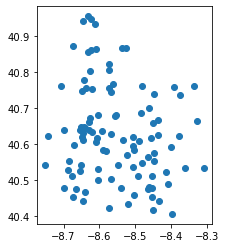

In [386]:
inst_ApoioDomi_CS_DistritoAVR_gdb_geo = gpd.GeoDataFrame(inst_ApoioDomi_CS_DistritoAVR_gdb, geometry=gpd.points_from_xy(inst_ApoioDomi_CS_DistritoAVR_gdb.Morada_longitude, inst_ApoioDomi_CS_DistritoAVR_gdb.Morada_latitude))
inst_ApoioDomi_CS_DistritoAVR_gdb_geo.plot()

In [387]:
inst_ApoioDomi_CS_DistritoAVR_gdb_geo.crs

In [388]:
inst_ApoioDomi_CS_DistritoAVR_gdb_geo= inst_ApoioDomi_CS_DistritoAVR_gdb_geo.set_crs("EPSG:4326")
inst_ApoioDomi_CS_DistritoAVR_gdb_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [389]:
inst_ApoioDomi_CS_DistritoAVR_gdb_geo= inst_ApoioDomi_CS_DistritoAVR_gdb_geo.to_crs("EPSG:3763")

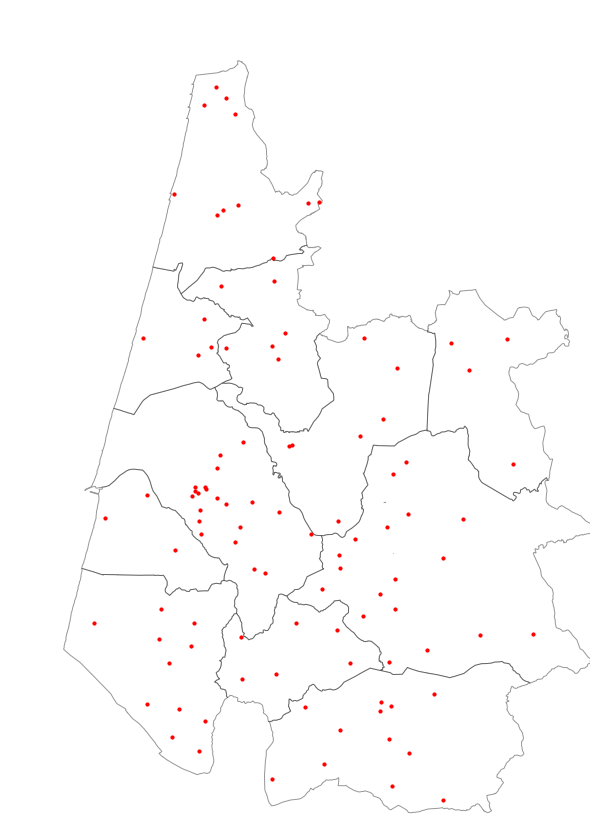

In [390]:
figura, ax = plt.subplots(figsize = (15,15) )
ax.set_aspect('equal')
inst_ApoioDomi_CS_DistritoAVR_gdb_geo.plot(ax=ax,zorder=2, 
                      marker='.', 
                      color='red', 
                      markersize=40)
CAOP2020_MUNI.plot(ax=ax, zorder=1, 
                             color='white', 
                             edgecolor='black', linewidth=1,
                            alpha = 0.4
                        )
ax.set_ylim(80000, 150000)
ax.set_xlim(-60000,-10000)
ax.set_axis_off()

#### População abrangida pelas instituições em cada município

#### População com dificuldades

In [391]:
Cobertura_existente_RA =inst_ApoioDomi_CS_DistritoAVR_gdb.merge(cobertura_existente, left_on=["InstAD_ID"], right_on = ["Instituicao"], how = "right" )

In [392]:
Cobertura_existente_RA_MUN =Cobertura_existente_RA.merge(BGRI2011withoutRES_CAOP2021_CS_DistritoAVR, left_on=["Subseccao"], right_on = BGRI2011withoutRES_CAOP2021_CS_DistritoAVR.index, how = "right" )

In [393]:
Cobertura_existente_RA_MUN=Cobertura_existente_RA_MUN[['InstAD_ID', 'Instituicao_x','Subseccao', 'BGRI11', 'Concelho']]

In [394]:
Cobertura_existente_RA_POP =Cobertura_existente_RA_MUN.merge(CS_DistritoAVR_BGRI11_POP11_dif, left_on=["BGRI11"], right_on = ['BGRI11'], how = "left" )

In [395]:
Cobertura_existente_RA_POP['tot_pop_abr_con'] = Cobertura_existente_RA_POP.groupby('Concelho')['Dificuldades_Select_B'].transform(np.sum)

In [396]:
TABLE_DIF_MUN = pd.pivot_table(Cobertura_existente_RA_POP,index=["Concelho"],
               values=["tot_pop_abr_con"]
               ,fill_value=0)

In [397]:
TABLE_DIF_MUN

,tot_pop_abr_con
Concelho,
Albergaria-a-Velha,1727
Anadia,2292
Aveiro,3654
Estarreja,2084
Murtosa,882
Oliveira do Bairro,1625
Ovar,2802
Sever do Vouga,946
Vagos,1639


#### População com mais de 65 anos

In [398]:
Cobertura_existente_RA_POP_mais65 =Cobertura_existente_RA_MUN.merge(CS_DistritoAVR_BGRI11_POP11_mais65, left_on=["BGRI11"], right_on = ['BGRI11'], how = "left" )

In [399]:
Cobertura_existente_RA_POP_mais65['tot_pop_abr_con'] = Cobertura_existente_RA_POP_mais65.groupby('Concelho')['N_INDIVIDUOS_RESIDENT_65'].transform(np.sum)

In [400]:
TABLE_MAIS65_MUN = pd.pivot_table(Cobertura_existente_RA_POP_mais65,index=["Concelho"],
               values=["tot_pop_abr_con"]
               ,fill_value=0)

In [401]:
TABLE_MAIS65_MUN

,tot_pop_abr_con
Concelho,
Albergaria-a-Velha,4525
Anadia,6763
Aveiro,13228
Estarreja,5358
Murtosa,2381
Oliveira do Bairro,4675
Ovar,8791
Sever do Vouga,2826
Vagos,4479


#### População total residente

In [402]:
Cobertura_existente_RA_POP_total=Cobertura_existente_RA_MUN.merge(CS_DistritoAVR_BGRI11_POP11_total, left_on=["BGRI11"], right_on = ['BGRI11'], how = "left" )

In [403]:
Cobertura_existente_RA_POP_total['tot_pop_abr_conc'] = Cobertura_existente_RA_POP_total.groupby('Concelho')['N_INDIVIDUOS_RESIDENT_HM'].transform(np.sum)

In [404]:
TABLE_TOTAL_MUN = pd.pivot_table(Cobertura_existente_RA_POP_total,index=["Concelho"],
               values=["tot_pop_abr_conc"]
               ,fill_value=0)

In [405]:
TABLE_TOTAL_MUN

,tot_pop_abr_conc
Concelho,
Albergaria-a-Velha,25078
Anadia,28462
Aveiro,78055
Estarreja,26490
Murtosa,10534
Oliveira do Bairro,22531
Ovar,55282
Sever do Vouga,12023
Vagos,22812


#### Distância Média

In [406]:
distmin=DistOSMR_cs_DistritoAVR_BGRI2011_to_instAD_distMatrix.min(axis=1)

In [407]:
distmin

0        919.9
1       3077.2
2       2947.6
3       3999.5
4       3892.9
         ...  
9157    2211.2
9158    2784.2
9159    8727.1
9160    4440.7
9161    4308.9
Length: 9162, dtype: float64

In [408]:
Cobertura_existente_RA_MUN['distmi']=DistOSMR_cs_DistritoAVR_BGRI2011_to_instAD_distMatrix.min(axis=1)

In [409]:
Cobertura_existente_RA_MUN

,InstAD_ID,Instituicao_x,Subseccao,BGRI11,Concelho,distmi
0,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,0,01020600122,Albergaria-a-Velha,919.9
1,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,1,01020600212,Albergaria-a-Velha,3077.2
2,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,2,01020600225,Albergaria-a-Velha,2947.6
3,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,3,01020600201,Albergaria-a-Velha,3999.5
4,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,4,01020600202,Albergaria-a-Velha,3892.9
...,...,...,...,...,...,...
9157,97,CENTRO SOCIAL DE AGADÃO,9157,01010100115,Águeda,2211.2
9158,97,CENTRO SOCIAL DE AGADÃO,9158,01010100114,Águeda,2784.2
9159,97,CENTRO SOCIAL DE AGADÃO,9159,01010100101,Águeda,8727.1
9160,97,CENTRO SOCIAL DE AGADÃO,9160,01010100110,Águeda,4440.7


In [410]:
table_pond=Cobertura_existente_RA_MUN.merge(CS_DistritoAVR_BGRI11_POP11_dif, left_on=Cobertura_existente_RA_MUN.index, right_on=CS_DistritoAVR_BGRI11_POP11_dif.index , how = "left" )

In [411]:
table_pond

,key_0,InstAD_ID,Instituicao_x,Subseccao,BGRI11_x,Concelho,distmi,BGRI11_y,SUBSECCAO,Dificuldades_Select,Dificuldades_Select_B
0,0,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,0,01020600122,Albergaria-a-Velha,919.9,01020600122,01020600122,0.0,1.0
1,1,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,1,01020600212,Albergaria-a-Velha,3077.2,01020600212,01020600212,0.0,1.0
2,2,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,2,01020600225,Albergaria-a-Velha,2947.6,01020600225,01020600225,5.0,5.0
3,3,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,3,01020600201,Albergaria-a-Velha,3999.5,01020600201,01020600201,0.0,1.0
4,4,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,4,01020600202,Albergaria-a-Velha,3892.9,01020600202,01020600202,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9157,9157,97,CENTRO SOCIAL DE AGADÃO,9157,01010100115,Águeda,2211.2,01010100115,01010100115,0.0,1.0
9158,9158,97,CENTRO SOCIAL DE AGADÃO,9158,01010100114,Águeda,2784.2,01010100114,01010100114,0.0,1.0
9159,9159,97,CENTRO SOCIAL DE AGADÃO,9159,01010100101,Águeda,8727.1,01010100101,01010100101,0.0,1.0
9160,9160,97,CENTRO SOCIAL DE AGADÃO,9160,01010100110,Águeda,4440.7,01010100110,01010100110,0.0,1.0


In [412]:
table_pond['distmi_Dificuldades']=table_pond.distmi*table_pond.Dificuldades_Select_B

In [413]:
table_pond

,key_0,InstAD_ID,Instituicao_x,Subseccao,BGRI11_x,Concelho,distmi,BGRI11_y,SUBSECCAO,Dificuldades_Select,Dificuldades_Select_B,distmi_Dificuldades
0,0,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,0,01020600122,Albergaria-a-Velha,919.9,01020600122,01020600122,0.0,1.0,919.9
1,1,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,1,01020600212,Albergaria-a-Velha,3077.2,01020600212,01020600212,0.0,1.0,3077.2
2,2,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,2,01020600225,Albergaria-a-Velha,2947.6,01020600225,01020600225,5.0,5.0,14738.0
3,3,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,3,01020600201,Albergaria-a-Velha,3999.5,01020600201,01020600201,0.0,1.0,3999.5
4,4,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,4,01020600202,Albergaria-a-Velha,3892.9,01020600202,01020600202,0.0,1.0,3892.9
...,...,...,...,...,...,...,...,...,...,...,...,...
9157,9157,97,CENTRO SOCIAL DE AGADÃO,9157,01010100115,Águeda,2211.2,01010100115,01010100115,0.0,1.0,2211.2
9158,9158,97,CENTRO SOCIAL DE AGADÃO,9158,01010100114,Águeda,2784.2,01010100114,01010100114,0.0,1.0,2784.2
9159,9159,97,CENTRO SOCIAL DE AGADÃO,9159,01010100101,Águeda,8727.1,01010100101,01010100101,0.0,1.0,8727.1
9160,9160,97,CENTRO SOCIAL DE AGADÃO,9160,01010100110,Águeda,4440.7,01010100110,01010100110,0.0,1.0,4440.7


In [414]:
Distancia_media_dif = pd.pivot_table(table_pond, index =["Concelho"], values = ["distmi_Dificuldades", "Dificuldades_Select_B"], aggfunc=np.sum )
Distancia_media_dif["PopDifB_FINAL"] =Distancia_media_dif["distmi_Dificuldades"] / Distancia_media_dif["Dificuldades_Select_B"]
Distancia_media_dif

,Dificuldades_Select_B,distmi_Dificuldades,PopDifB_FINAL
Concelho,,,
Albergaria-a-Velha,1727.0,3663947.1,2121.567516
Anadia,2292.0,4800178.3,2094.318630
Aveiro,3654.0,5302532.8,1451.158402
Estarreja,2084.0,3622413.8,1738.202399
Murtosa,882.0,1186938.3,1345.735034
Oliveira do Bairro,1625.0,3079570.3,1895.120185
Ovar,2802.0,5044085.7,1800.173340
Sever do Vouga,946.0,3204455.1,3387.373256
Vagos,1639.0,2812790.1,1716.162355


In [415]:
table_pond=Cobertura_existente_RA_MUN.merge(CS_DistritoAVR_BGRI11_POP11_mais65, left_on=Cobertura_existente_RA_MUN.index, right_on=CS_DistritoAVR_BGRI11_POP11_mais65.index , how = "left" )

In [416]:
table_pond['dist_min_mais65']=(table_pond.distmi*table_pond.N_INDIVIDUOS_RESIDENT_65)

In [417]:
table_pond

,key_0,InstAD_ID,Instituicao_x,Subseccao,BGRI11_x,Concelho,distmi,BGRI11_y,GEO_COD,N_INDIVIDUOS_RESIDENT_65,dist_min_mais65
0,0,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,0,01020600122,Albergaria-a-Velha,919.9,01020600122,01020600122,10,9199.0
1,1,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,1,01020600212,Albergaria-a-Velha,3077.2,01020600212,01020600212,0,0.0
2,2,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,2,01020600225,Albergaria-a-Velha,2947.6,01020600225,01020600225,8,23580.8
3,3,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,3,01020600201,Albergaria-a-Velha,3999.5,01020600201,01020600201,0,0.0
4,4,89,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,4,01020600202,Albergaria-a-Velha,3892.9,01020600202,01020600202,2,7785.8
...,...,...,...,...,...,...,...,...,...,...,...
9157,9157,97,CENTRO SOCIAL DE AGADÃO,9157,01010100115,Águeda,2211.2,01010100115,01010100115,4,8844.8
9158,9158,97,CENTRO SOCIAL DE AGADÃO,9158,01010100114,Águeda,2784.2,01010100114,01010100114,4,11136.8
9159,9159,97,CENTRO SOCIAL DE AGADÃO,9159,01010100101,Águeda,8727.1,01010100101,01010100101,3,26181.3
9160,9160,97,CENTRO SOCIAL DE AGADÃO,9160,01010100110,Águeda,4440.7,01010100110,01010100110,3,13322.1


In [418]:
Distancia_media_mais65 = pd.pivot_table(table_pond, index =["Concelho"], values = ["dist_min_mais65", "N_INDIVIDUOS_RESIDENT_65"], aggfunc=np.sum )
Distancia_media_mais65["Popmais65_FINAL"] =Distancia_media_mais65["dist_min_mais65"] / Distancia_media_mais65["N_INDIVIDUOS_RESIDENT_65"]
Distancia_media_mais65

,N_INDIVIDUOS_RESIDENT_65,dist_min_mais65,Popmais65_FINAL
Concelho,,,
Albergaria-a-Velha,4525,9457038.6,2089.953282
Anadia,6763,14135758.9,2090.161008
Aveiro,13228,18173696.7,1373.880912
Estarreja,5358,9922298.8,1851.866144
Murtosa,2381,3532466.5,1483.606258
Oliveira do Bairro,4675,9212606.1,1970.610930
Ovar,8791,15864814.4,1804.665499
Sever do Vouga,2826,9817726.0,3474.071479
Vagos,4479,7796850.4,1740.756955


In [419]:
table_pond=Cobertura_existente_RA_MUN.merge(CS_DistritoAVR_BGRI11_POP11_total, left_on=Cobertura_existente_RA_MUN.index, right_on=CS_DistritoAVR_BGRI11_POP11_total.index , how = "left" )

In [420]:
table_pond['dist_min_total']=(table_pond.distmi*table_pond.N_INDIVIDUOS_RESIDENT_HM)

In [421]:
Distancia_media_total = pd.pivot_table(table_pond, index =["Concelho"], values = ["dist_min_total", "N_INDIVIDUOS_RESIDENT_HM"], aggfunc=np.sum )
Distancia_media_total["Popmais65_FINAL"] =Distancia_media_total["dist_min_total"] / Distancia_media_total["N_INDIVIDUOS_RESIDENT_HM"]
Distancia_media_total

,N_INDIVIDUOS_RESIDENT_HM,dist_min_total,Popmais65_FINAL
Concelho,,,
Albergaria-a-Velha,25078,51698376.7,2061.503178
Anadia,28462,58205247.5,2045.016074
Aveiro,78055,111672079.2,1430.684507
Estarreja,26490,49729660.2,1877.299366
Murtosa,10534,15457189.8,1467.361857
Oliveira do Bairro,22531,42969958.5,1907.148307
Ovar,55282,103307617.0,1868.738776
Sever do Vouga,12023,40438902.9,3363.461940
Vagos,22812,41273154.6,1809.273830


#### Àrea média abrangida em cada município

In [422]:
Total_area_subseccao=BGRI2011withoutRES_CAOP2021_CS_DistritoAVR.groupby(['BGRI11']).agg({'AREASUBSEC':'sum'}).reset_index()

In [423]:
Area_por_subseccao=Cobertura_existente_RA_MUN.merge(Total_area_subseccao, left_on=["BGRI11"], right_on=['BGRI11'], how = "left" )

In [424]:
Result_mean=Area_por_subseccao.groupby(['Concelho']).agg({'AREASUBSEC':'mean'}).reset_index()

In [425]:
Result_mean

,Concelho,AREASUBSEC
0,Albergaria-a-Velha,57990.199104
1,Anadia,79129.970062
2,Aveiro,70853.795041
3,Estarreja,64330.937881
4,Murtosa,77127.119227
5,Oliveira do Bairro,87327.403268
6,Ovar,138740.752577
7,Sever do Vouga,103312.451450
8,Vagos,121379.358514
9,Águeda,65923.986505


#### Número de instituições que abrangem cada município

In [426]:
result=Cobertura_existente_RA_MUN.groupby(['Concelho']).agg({"InstAD_ID": "nunique"})

In [427]:
result

,InstAD_ID
Concelho,
Albergaria-a-Velha,12
Anadia,16
Aveiro,23
Estarreja,11
Murtosa,6
Oliveira do Bairro,11
Ovar,12
Sever do Vouga,5
Vagos,15


In [428]:
result.sum()

InstAD_ID    140
dtype: int64

#### Número de instituições localizadas em cada município

In [429]:
file = open(r'C:\Users\ritam\OneDrive - Universidade de Aveiro\Dissertacao\DISSERTACAO_WORK\DADOS_PROCESSADOS\PIKLE\INDOBJECTS\db_inst_ApoioDomi_CS_DistritoAVR_withCAOPFREG_gdb.pkl', "rb")
inst_ApoioDomi_CS_DistritoAVR_withCAOPFREG_gdb = pickle.load(file)
file.close() 

In [430]:
result=inst_ApoioDomi_CS_DistritoAVR_withCAOPFREG_gdb.groupby(['Concelho']).agg({"InstAD_ID": "nunique"})

In [431]:
result

,InstAD_ID
Concelho,
Albergaria-a-Velha,7
Anadia,12
Aveiro,21
Estarreja,6
Murtosa,4
Oliveira do Bairro,6
Ovar,11
Sever do Vouga,4
Vagos,11


In [432]:
result.sum()

InstAD_ID    103
dtype: int64

#### Mapas

In [433]:
CS_DistritoAVR_BGRI11_POP11_dif = pd.merge(BGRI2011withoutRES_CAOP2021_CS_DistritoAVR, CS_DistritoAVR_BGRI11_POP11_dif, how='left', left_on = 'BGRI11', right_on = 'SUBSECCAO')

In [434]:
CS_DistritoAVR_BGRI11_POP11_dif 

,DTMN11,BGRI11_x,LUG11,LUG11DESIG,DICOFRE,AREASUBSEC,Shape_Leng,Shape_Area,geometry,DTMN21,Concelho,NUTSIII_DSG,NUTSIII_COD,BGRI11_y,SUBSECCAO,Dificuldades_Select,Dificuldades_Select_B
0,0102,01020600122,014598,Alto dos Barreiros,010206,32732.593515,1072.979271,32732.593515,"POLYGON ((-26770.489 119221.846, -26765.826 11...",0102,Albergaria-a-Velha,Região de Aveiro,16D,01020600122,01020600122,0.0,1.0
1,0102,01020600212,014608,Telhadela,010206,190164.817607,3321.252092,190164.817607,"POLYGON ((-26828.760 121484.714, -26829.757 12...",0102,Albergaria-a-Velha,Região de Aveiro,16D,01020600212,01020600212,0.0,1.0
2,0102,01020600225,014608,Telhadela,010206,225794.084516,2717.542543,225794.084516,"POLYGON ((-26717.378 120739.956, -26729.351 12...",0102,Albergaria-a-Velha,Região de Aveiro,16D,01020600225,01020600225,5.0,5.0
3,0102,01020600201,014608,Telhadela,010206,68453.088201,1287.644148,68453.088201,"POLYGON ((-26743.010 122557.080, -26784.416 12...",0102,Albergaria-a-Velha,Região de Aveiro,16D,01020600201,01020600201,0.0,1.0
4,0102,01020600202,014608,Telhadela,010206,99220.048608,1422.481266,99220.048608,"POLYGON ((-26685.788 122445.468, -26676.605 12...",0102,Albergaria-a-Velha,Região de Aveiro,16D,01020600202,01020600202,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9157,0101,01010100115,014426,Lomba,010101,109662.727353,2082.430518,109662.727353,"POLYGON ((-15277.170 96771.640, -15281.176 967...",0101,Águeda,Região de Aveiro,16D,01010100115,01010100115,0.0,1.0
9158,0101,01010100114,014428,Vila Mendo,010101,56414.256688,1463.860668,56414.256688,"POLYGON ((-15422.652 97179.651, -15426.911 971...",0101,Águeda,Região de Aveiro,16D,01010100114,01010100114,0.0,1.0
9159,0101,01010100101,014420,Alcafaz,010101,181160.944222,3072.929210,181160.944222,"POLYGON ((-16197.871 101120.085, -16197.873 10...",0101,Águeda,Região de Aveiro,16D,01010100101,01010100101,0.0,1.0
9160,0101,01010100110,014422,Foz,010101,162631.316646,2536.350328,162631.316646,"POLYGON ((-15983.302 98000.233, -15986.565 979...",0101,Águeda,Região de Aveiro,16D,01010100110,01010100110,0.0,1.0


In [435]:
Total_difi_por_freg=CS_DistritoAVR_BGRI11_POP11_dif.groupby(['DICOFRE']).agg({'Dificuldades_Select':'sum'}).reset_index()

In [436]:
Aveiro_dif_freg =CS_DistritoAVR_BGRI11_POP11_dif.merge(Total_difi_por_freg, left_on=['DICOFRE'], right_on = ["DICOFRE"], how = "right" )

<AxesSubplot:>

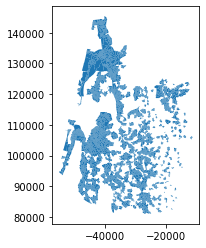

In [437]:
Aveiro_dif_freg = gpd.GeoDataFrame(Aveiro_dif_freg, geometry=Aveiro_dif_freg.geometry)
Aveiro_dif_freg.plot()

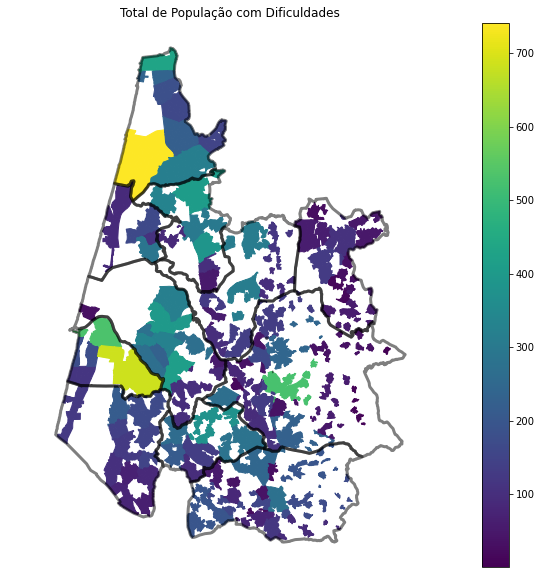

In [438]:
figura, ax = plt.subplots(1, figsize=(10,10))
Aveiro_dif_freg.plot(ax=ax, edgecolors='face', column=(Aveiro_dif_freg.Dificuldades_Select_y), 
                               legend=True) 
CAOP2020_MUNI.plot(ax=ax, color='None', edgecolor='black', linewidth=3,
                            alpha = 0.5)
ax.set_xbound(-3e6, 6e6)
ax.set_ybound(0.4e7, 1.2e7)
ax.set_axis_off()
ax.set_title('Total de População com Dificuldades')
plt.axis('equal')
plt.show()

In [439]:
CS_DistritoAVR_BGRI11_POP11 = pd.merge(Aveiro_dif_freg, CS_DistritoAVR_BGRI11_POP11_total, how='left', left_on = 'BGRI11_x', right_on = 'BGRI11')

In [440]:
Total_por_freg=CS_DistritoAVR_BGRI11_POP11.groupby(['DICOFRE']).agg({'N_INDIVIDUOS_RESIDENT_HM':'sum'}).reset_index()

In [441]:
Aveiro_dif_freg_relativo =CS_DistritoAVR_BGRI11_POP11.merge(Total_por_freg, left_on=['DICOFRE'], right_on = ["DICOFRE"], how = "right" )

In [442]:
Aveiro_dif_freg_relativo['pop_dif_relativa']=Aveiro_dif_freg_relativo['Dificuldades_Select_y']/Aveiro_dif_freg_relativo['N_INDIVIDUOS_RESIDENT_HM_y']

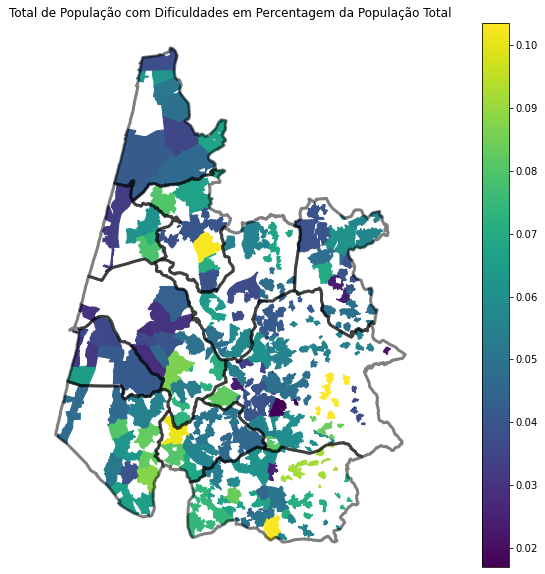

In [443]:
figura, ax = plt.subplots(1, figsize=(10,10))
Aveiro_dif_freg_relativo.plot(ax=ax, edgecolors='face', column=(Aveiro_dif_freg_relativo.pop_dif_relativa), 
                               legend=True) 
CAOP2020_MUNI.plot(ax=ax, color='None', edgecolor='black', linewidth=3,
                            alpha = 0.5)
ax.set_xbound(-3e6, 6e6)
ax.set_ybound(0.4e7, 1.2e7)
ax.set_axis_off()
ax.set_title('Total de População com Dificuldades em Percentagem da População Total')
plt.axis('equal')
plt.show()

In [444]:
CS_DistritoAVR_BGRI11_POP11_mais65 = pd.merge(BGRI2011withoutRES_CAOP2021_CS_DistritoAVR, CS_DistritoAVR_BGRI11_POP11_mais65, how='left', left_on = 'BGRI11', right_on = 'BGRI11')

In [445]:
tot_pop_mais65_freg=CS_DistritoAVR_BGRI11_POP11_mais65.groupby(['DICOFRE']).agg({'N_INDIVIDUOS_RESIDENT_65':'sum'}).reset_index()

In [446]:
Aveiro_mais65_freg =CS_DistritoAVR_BGRI11_POP11_mais65.merge(tot_pop_mais65_freg, left_on=['DICOFRE'], right_on = ["DICOFRE"], how = "right" )

In [447]:
Aveiro_mais65_freg_total =Aveiro_mais65_freg.merge(Total_por_freg, left_on=['DICOFRE'], right_on = ["DICOFRE"], how = "right" )

In [448]:
Aveiro_mais65_freg_total['pop_mais65_relativa']=Aveiro_mais65_freg_total['N_INDIVIDUOS_RESIDENT_65_y']/Aveiro_mais65_freg_total['N_INDIVIDUOS_RESIDENT_HM']

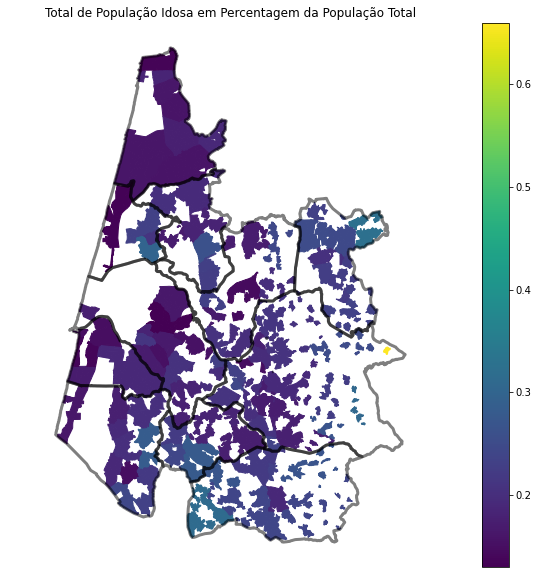

In [449]:
figura, ax = plt.subplots(1, figsize=(10,10))
Aveiro_mais65_freg_total.plot(ax=ax, edgecolors='face', column=(Aveiro_mais65_freg_total.pop_mais65_relativa), 
                               legend=True) 
CAOP2020_MUNI.plot(ax=ax, color='None', edgecolor='black', linewidth=3,
                            alpha = 0.5)
ax.set_xbound(-3e6, 6e6)
ax.set_ybound(0.4e7, 1.2e7)
ax.set_axis_off()
ax.set_title('Total de População Idosa em Percentagem da População Total')
plt.axis('equal')
plt.show()

#### Cobertura otimizada

In [ ]:
file = open(r'C:/Users/ritam/OneDrive - Universidade de Aveiro/Dissertacao/DISSERTACAO_WORK/DADOS_PROCESSADOS/PIKLE/INDOBJECTS/db_CS_DistritoAVR_pmedian_PopDif_solve.pkl', "rb")
pmedian_PopDif_solve=pickle.load(file)
file.close() 

In [ ]:
optires_PopDif_df_cli2fac = pd.DataFrame(pmedian_PopDif_solve.cli2fac)
optires_PopDif_df_cli2fac.head

In [ ]:
file = open(r'C:/Users/ritam/OneDrive - Universidade de Aveiro/Dissertacao/DISSERTACAO_WORK/DADOS_PROCESSADOS/PIKLE/INDOBJECTS/db_CS_DistritoAVR_pmedian_PopMais65_solve.pkl', "rb")
pmedian_PopMais65_solve=pickle.load(file)
file.close() 

In [ ]:
optires_PopMais65_df_cli2fac = pd.DataFrame(pmedian_PopMais65_solve.cli2fac)
optires_PopMais65_df_cli2fac.head

In [ ]:
file = open(r'C:/Users/ritam/OneDrive - Universidade de Aveiro/Dissertacao/DISSERTACAO_WORK/DADOS_PROCESSADOS/PIKLE/INDOBJECTS/db_CS_DistritoAVR_pmedian_PopTotal_solve.pkl', "rb")
pmedian_PopTotal_solve=pickle.load(file)
file.close() 

In [ ]:
optires_PopTotal_df_cli2fac = pd.DataFrame(pmedian_PopTotal_solve.cli2fac)
optires_PopTotal_df_cli2fac.head

##### População com dificuldades

In [154]:
ot_PopDif = pd.read_csv(("Ot_PopDif.csv"), sep=";")

In [155]:
Cobertura_otimizada_PopDif_grib =ot_PopDif.merge(grid_COS2018_Urb_cs_DistritoAVR_points, left_on=["grid"], right_on = grid_COS2018_Urb_cs_DistritoAVR_points.index, how = "left" )

In [156]:
Cobertura_otimizada_PopDif =ot_PopDif.merge(BGRI2011withoutRES_CAOP2021_CS_DistritoAVR, left_on=["Subseccao"], right_on = BGRI2011withoutRES_CAOP2021_CS_DistritoAVR.index, how = "right" )

<AxesSubplot:>

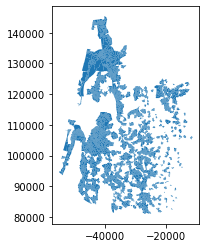

In [157]:
Cobertura_otimizada_PopDif = gpd.GeoDataFrame(Cobertura_otimizada_PopDif, geometry=Cobertura_otimizada_PopDif.geometry)
Cobertura_otimizada_PopDif.plot()

<AxesSubplot:>

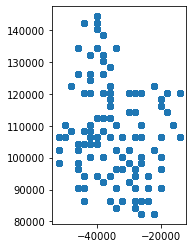

In [158]:
Cobertura_otimizada_PopDif_grib=gpd.GeoDataFrame(Cobertura_otimizada_PopDif_grib, geometry=Cobertura_otimizada_PopDif_grib.geometry)
Cobertura_otimizada_PopDif_grib.plot()

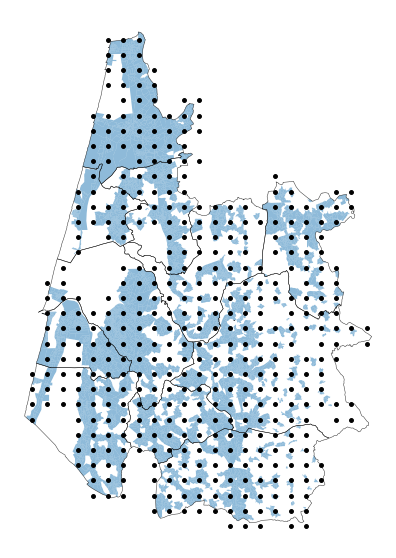

In [159]:
figura, ax = plt.subplots(figsize = (10,10))
ax.set_aspect('equal')
Cobertura_otimizada_PopDif.plot(ax=ax, edgecolor='None', alpha=0.5)
grid_COS2018_Urb_cs_DistritoAVR_points.plot(ax=ax, zorder=1, 
                             marker='.', 
                      color='black', 
                      markersize=60)
CAOP2020_MUNI.plot(ax=ax, color='None', edgecolor='black', linewidth=0.5,
                            alpha = 0.8)
ax.set_axis_off()

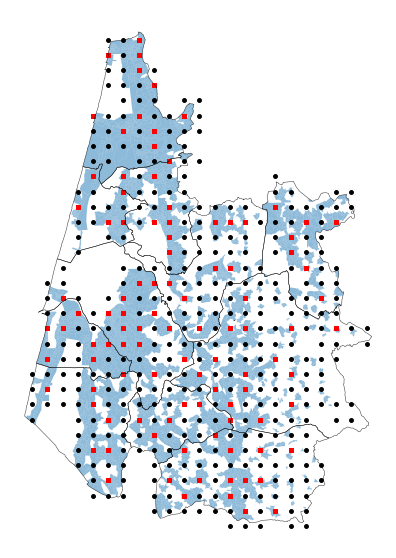

In [160]:
figura, ax = plt.subplots(figsize = (10,10))
ax.set_aspect('equal')
Cobertura_otimizada_PopDif.plot(ax=ax, edgecolor='None', alpha=0.5)
grid_COS2018_Urb_cs_DistritoAVR_points.plot(ax=ax, zorder=1, 
                             marker='.', 
                      color='black', 
                      markersize=60)
Cobertura_otimizada_PopDif_grib.plot(ax=ax, zorder=1, 
                             marker='.', 
                      color='red', 
                      markersize=60)
CAOP2020_MUNI.plot(ax=ax, color='None', edgecolor='black', linewidth=0.5,
                            alpha = 0.8)
ax.set_axis_off()

In [161]:
Matriz_Dist_BGRI11_GRID = pd.DataFrame(CostMatrix_DistOSMR_cs_DistritoAVR_BGRI2011_to_GRID_distMatrix)

In [162]:
ot_PopDif_sim = pd.read_csv(("Ot_PopDif_sim.csv"), sep=";")

In [163]:
ot_PopDif_sim.columns = ['Coluna_1', 'Coluna_2']

In [164]:
ot_PopDif_sim=ot_PopDif_sim.drop(columns=['Coluna_1'])

In [165]:
ot_PopDif_sim.columns = ['0']

In [166]:
ot_PopDif_sim["dist_OSRM"] = np.nan

for i in range(0,len(ot_PopDif_sim[1:])) : 

    ot_PopDif_sim.iloc[i,1]= DistOSMR_cs_DistritoAVR_BGRI2011_to_GRID_distMatrix.iloc[i][(ot_PopDif_sim.iloc[i].values[0])]

In [167]:
DistOSMR_cs_DistritoAVR_BGRI2011_to_GRID_distMatrix.iloc[9161,367]

8277.2

In [168]:
ot_PopDif_sim["dist_OSRM"].fillna(8277.2, inplace = True)

In [169]:
Cobertura_otimizada_PopDif_grib_concelho = pd.merge(ot_PopDif_sim,  BGRI2011withoutRES_CAOP2021_CS_DistritoAVR, right_index=True, left_index=True)

In [170]:
Cobertura_otimizada_PopDif_grib_concelho=Cobertura_otimizada_PopDif_grib_concelho[['0' ,'dist_OSRM', 'Concelho']]

In [176]:
Cobertura_otimizada_PopDif_grib_concelho = pd.merge(Cobertura_otimizada_PopDif_grib_concelho,  CS_DistritoAVR_BGRI11_POP11_dif, right_index=True, left_index=True)

In [172]:
tot_pop = Cobertura_otimizada_PopDif_grib_concelho.groupby('Concelho').sum(['Dificuldades_Select_B_x'])

In [174]:
tot_pop

,0,dist_OSRM,Dificuldades_Select,Dificuldades_Select_B
Concelho,,,,
Albergaria-a-Velha,211381,1761281.5,1255.0,1727.0
Anadia,271723,1866879.1,1788.0,2292.0
Aveiro,138455,2032540.7,3183.0,3654.0
Estarreja,128498,1416934.8,1664.0,2084.0
Murtosa,29557,736458.8,647.0,882.0
Oliveira do Bairro,116347,1233126.2,1358.0,1625.0
Ovar,97846,1452727.9,2445.0,2802.0
Sever do Vouga,211372,1341666.1,605.0,946.0
Vagos,41256,1356424.1,1323.0,1639.0


In [177]:
Cobertura_otimizada_PopDif_grib_concelho

,0,dist_OSRM,Concelho,BGRI11_x,SUBSECCAO_x,Dificuldades_Select_x,Dificuldades_Select_B_x,dist_concelho,BGRI11_y,SUBSECCAO_y,Dificuldades_Select_y,Dificuldades_Select_B_y
0,293,2089.2,Albergaria-a-Velha,01020600122,01020600122,0.0,1.0,1761281.5,01020600122,01020600122,0.0,1.0
1,293,1523.4,Albergaria-a-Velha,01020600212,01020600212,0.0,1.0,1761281.5,01020600212,01020600212,0.0,1.0
2,293,1393.8,Albergaria-a-Velha,01020600225,01020600225,5.0,5.0,1761281.5,01020600225,01020600225,5.0,5.0
3,293,2445.7,Albergaria-a-Velha,01020600201,01020600201,0.0,1.0,1761281.5,01020600201,01020600201,0.0,1.0
4,293,2339.1,Albergaria-a-Velha,01020600202,01020600202,0.0,1.0,1761281.5,01020600202,01020600202,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9157,367,8828.1,Águeda,01010100115,01010100115,0.0,1.0,3293040.8,01010100115,01010100115,0.0,1.0
9158,367,7848.7,Águeda,01010100114,01010100114,0.0,1.0,3293040.8,01010100114,01010100114,0.0,1.0
9159,365,7043.9,Águeda,01010100101,01010100101,0.0,1.0,3293040.8,01010100101,01010100101,0.0,1.0
9160,367,6192.2,Águeda,01010100110,01010100110,0.0,1.0,3293040.8,01010100110,01010100110,0.0,1.0


In [178]:
Cobertura_otimizada_PopDif_grib_concelho['dist_min_total']=(Cobertura_otimizada_PopDif_grib_concelho.dist_OSRM*Cobertura_otimizada_PopDif_grib_concelho.Dificuldades_Select_B_x)

In [179]:
Distancia_media_otim_dif = pd.pivot_table(Cobertura_otimizada_PopDif_grib_concelho, index =["Concelho"], values = ["dist_min_total", "Dificuldades_Select_B_x"], aggfunc=np.sum )
Distancia_media_otim_dif["Popdif_FINAL"] =Distancia_media_otim_dif["dist_min_total"] / Distancia_media_otim_dif["Dificuldades_Select_B_x"]
Distancia_media_otim_dif

,Dificuldades_Select_B_x,dist_min_total,Popmais65_FINAL
Concelho,,,
Albergaria-a-Velha,1727.0,3375723.8,1954.675043
Anadia,2292.0,4107594.7,1792.144284
Aveiro,3654.0,6299227.8,1723.926601
Estarreja,2084.0,3346494.9,1605.803695
Murtosa,882.0,1312096.2,1487.637415
Oliveira do Bairro,1625.0,3085363.0,1898.684923
Ovar,2802.0,4463338.5,1592.911670
Sever do Vouga,946.0,2039263.7,2155.669873
Vagos,1639.0,3181774.1,1941.289872


In [180]:
ot_PopMais65 = pd.read_csv(("Ot_PopMais65.csv"), sep=";")

In [181]:
Cobertura_otimizada_PopMais65_grib =ot_PopMais65.merge(grid_COS2018_Urb_cs_DistritoAVR_points, left_on=["GRID"], right_on = grid_COS2018_Urb_cs_DistritoAVR_points.index, how = "left" )

In [182]:
Cobertura_otimizada_PopMais65 =ot_PopMais65.merge(BGRI2011withoutRES_CAOP2021_CS_DistritoAVR, left_on=["Subseccao"], right_on = BGRI2011withoutRES_CAOP2021_CS_DistritoAVR.index, how = "right" )

<AxesSubplot:>

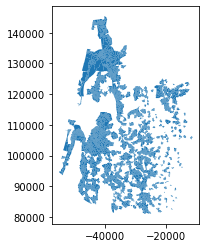

In [183]:
Cobertura_otimizada_PopMais65 = gpd.GeoDataFrame(Cobertura_otimizada_PopMais65, geometry=Cobertura_otimizada_PopMais65.geometry)
Cobertura_otimizada_PopMais65.plot()

<AxesSubplot:>

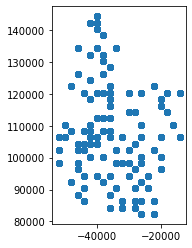

In [184]:
Cobertura_otimizada_PopMais65_grib=gpd.GeoDataFrame(Cobertura_otimizada_PopMais65_grib, geometry=Cobertura_otimizada_PopMais65_grib.geometry)
Cobertura_otimizada_PopMais65_grib.plot()

In [185]:
Cobertura_otimizada_PopMais65_grib.geometry.value_counts()

POINT (-50160.578 110342.080)    1116
POINT (-26160.578 100342.080)     205
POINT (-44160.578 108342.080)     195
POINT (-44160.578 120342.080)     171
POINT (-42160.578 124342.080)     152
                                 ... 
POINT (-38160.578 112342.080)      42
POINT (-20160.578 100342.080)      41
POINT (-44160.578 94342.080)       40
POINT (-14160.578 106342.080)      25
POINT (-46160.578 126342.080)      16
Name: geometry, Length: 103, dtype: int64

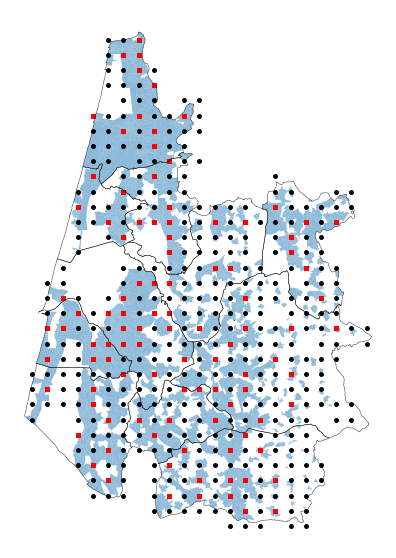

In [186]:
figura, ax = plt.subplots(figsize = (10,10))
ax.set_aspect('equal')
Cobertura_otimizada_PopMais65.plot(ax=ax, edgecolor='None', alpha=0.5)
grid_COS2018_Urb_cs_DistritoAVR_points.plot(ax=ax, zorder=1, 
                             marker='.', 
                      color='black', 
                      markersize=60)
Cobertura_otimizada_PopMais65_grib.plot(ax=ax, zorder=1, 
                             marker='.', 
                      color='red', 
                      markersize=60)
CAOP2020_MUNI.plot(ax=ax, color='None', edgecolor='black', linewidth=0.5,
                            alpha = 0.8)
ax.set_axis_off()

In [196]:
ot_PopMais65_sim = pd.read_csv(("Ot_PopMais65_sim.csv"), sep=";")

In [197]:
ot_PopMais65_sim.columns = ['Coluna_1', 'Coluna_2']

In [198]:
ot_PopMais65_sim=ot_PopMais65_sim.drop(columns=['Coluna_1'])

In [199]:
ot_PopMais65_sim.columns = ['0']

In [200]:
ot_PopMais65_sim["dist_OSRM"] = np.nan

for i in range(0,len(ot_PopMais65_sim[1:])) : 

    ot_PopMais65_sim.iloc[i,1]= DistOSMR_cs_DistritoAVR_BGRI2011_to_GRID_distMatrix.iloc[i][(ot_PopMais65_sim.iloc[i].values[0])]

In [201]:
ot_PopMais65_sim["dist_OSRM"].fillna(8277.2, inplace = True)

In [202]:
Cobertura_otimizada_PopMais65_grib_concelho = pd.merge(ot_PopMais65_sim,  BGRI2011withoutRES_CAOP2021_CS_DistritoAVR, right_index=True, left_index=True)

In [204]:
Cobertura_otimizada_PopMais65_grib_concelho=Cobertura_otimizada_PopMais65_grib_concelho[['0' ,'dist_OSRM', 'Concelho']]

In [205]:
Cobertura_otimizada_PopMais65_grib_concelho = pd.merge(Cobertura_otimizada_PopMais65_grib_concelho,  CS_DistritoAVR_BGRI11_POP11_mais65, right_index=True, left_index=True)

In [206]:
Cobertura_otimizada_PopMais65_grib_concelho

,0,dist_OSRM,Concelho,BGRI11,GEO_COD,N_INDIVIDUOS_RESIDENT_65
0,293,2089.2,Albergaria-a-Velha,01020600122,01020600122,10
1,101,29306.0,Albergaria-a-Velha,01020600212,01020600212,0
2,293,1393.8,Albergaria-a-Velha,01020600225,01020600225,8
3,15,46210.7,Albergaria-a-Velha,01020600201,01020600201,0
4,293,2339.1,Albergaria-a-Velha,01020600202,01020600202,2
...,...,...,...,...,...,...
9157,367,8828.1,Águeda,01010100115,01010100115,4
9158,367,7848.7,Águeda,01010100114,01010100114,4
9159,365,7043.9,Águeda,01010100101,01010100101,3
9160,367,6192.2,Águeda,01010100110,01010100110,3


In [207]:
tot_pop = Cobertura_otimizada_PopMais65_grib_concelho.groupby('Concelho').sum(['N_INDIVIDUOS_RESIDENT_65'])

In [208]:
tot_pop

,0,dist_OSRM,N_INDIVIDUOS_RESIDENT_65
Concelho,,,
Albergaria-a-Velha,180337,5899125.2,4525
Anadia,246141,6143505.5,6763
Aveiro,129375,3498233.8,13228
Estarreja,115962,4160230.6,5358
Murtosa,27004,1696233.3,2381
Oliveira do Bairro,110644,2105083.0,4675
Ovar,94341,3496301.2,8791
Sever do Vouga,172729,6555714.9,2826
Vagos,35436,3472075.5,4479


In [209]:
Cobertura_otimizada_PopMais65_grib_concelho['dist_min_total']=(Cobertura_otimizada_PopMais65_grib_concelho.dist_OSRM*Cobertura_otimizada_PopMais65_grib_concelho.N_INDIVIDUOS_RESIDENT_65)

In [210]:
Cobertura_otimizada_PopMais65_grib_concelho

,0,dist_OSRM,Concelho,BGRI11,GEO_COD,N_INDIVIDUOS_RESIDENT_65,dist_min_total
0,293,2089.2,Albergaria-a-Velha,01020600122,01020600122,10,20892.0
1,101,29306.0,Albergaria-a-Velha,01020600212,01020600212,0,0.0
2,293,1393.8,Albergaria-a-Velha,01020600225,01020600225,8,11150.4
3,15,46210.7,Albergaria-a-Velha,01020600201,01020600201,0,0.0
4,293,2339.1,Albergaria-a-Velha,01020600202,01020600202,2,4678.2
...,...,...,...,...,...,...,...
9157,367,8828.1,Águeda,01010100115,01010100115,4,35312.4
9158,367,7848.7,Águeda,01010100114,01010100114,4,31394.8
9159,365,7043.9,Águeda,01010100101,01010100101,3,21131.7
9160,367,6192.2,Águeda,01010100110,01010100110,3,18576.6


In [212]:
Distancia_media_otim_mais65 = pd.pivot_table(Cobertura_otimizada_PopMais65_grib_concelho, index =["Concelho"], values = ["dist_min_total", "N_INDIVIDUOS_RESIDENT_65"], aggfunc=np.sum )
Distancia_media_otim_mais65["Popmais65_FINAL"] =Distancia_media_otim_mais65["dist_min_total"] / Distancia_media_otim_mais65["N_INDIVIDUOS_RESIDENT_65"]
Distancia_media_otim_mais65

,N_INDIVIDUOS_RESIDENT_65,dist_min_total,Popmais65_FINAL
Concelho,,,
Albergaria-a-Velha,4525,9025708.3,1994.631669
Anadia,6763,12378058.8,1830.261541
Aveiro,13228,21342382.1,1613.424713
Estarreja,5358,8931075.0,1666.867301
Murtosa,2381,3335096.7,1400.712600
Oliveira do Bairro,4675,9358892.3,2001.902096
Ovar,8791,14507298.8,1650.244432
Sever do Vouga,2826,5983303.9,2117.234218
Vagos,4479,8270906.9,1846.596763


In [213]:
ot_PopTotal=pd.read_csv(("Ot_PopTotal.csv"), sep=";")

In [214]:
Cobertura_otimizada_PopTotal_grib =ot_PopTotal.merge(grid_COS2018_Urb_cs_DistritoAVR_points, left_on=["grid"], right_on = grid_COS2018_Urb_cs_DistritoAVR_points.index, how = "left" )

In [215]:
Cobertura_otimizada_PopTotal =ot_PopTotal.merge(BGRI2011withoutRES_CAOP2021_CS_DistritoAVR, left_on=["Subseccao"], right_on = BGRI2011withoutRES_CAOP2021_CS_DistritoAVR.index, how = "right" )

<AxesSubplot:>

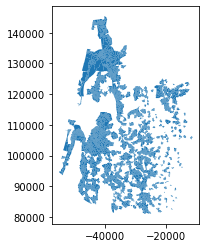

In [216]:
Cobertura_otimizada_PopTotal = gpd.GeoDataFrame(Cobertura_otimizada_PopTotal, geometry=Cobertura_otimizada_PopTotal.geometry)
Cobertura_otimizada_PopTotal.plot()

<AxesSubplot:>

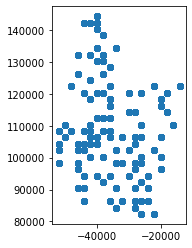

In [217]:
Cobertura_otimizada_PopTotal_grib=gpd.GeoDataFrame(Cobertura_otimizada_PopTotal_grib, geometry=Cobertura_otimizada_PopTotal_grib.geometry)
Cobertura_otimizada_PopTotal_grib.plot()

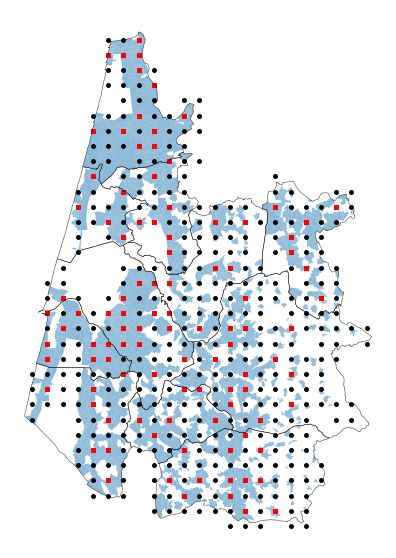

In [218]:
figura, ax = plt.subplots(figsize = (10,10))
ax.set_aspect('equal')
Cobertura_otimizada_PopTotal.plot(ax=ax, edgecolor='None', alpha=0.5)
grid_COS2018_Urb_cs_DistritoAVR_points.plot(ax=ax, zorder=1, 
                             marker='.', 
                      color='black', 
                      markersize=60)
Cobertura_otimizada_PopTotal_grib.plot(ax=ax, zorder=1, 
                             marker='.', 
                      color='red', 
                      markersize=60)
CAOP2020_MUNI.plot(ax=ax, color='None', edgecolor='black', linewidth=0.5,
                            alpha = 0.8)
ax.set_axis_off()

In [219]:
ot_PopTotal_sim = pd.read_csv(("Ot_PopTotal_sim.csv"), sep=";")

In [220]:
ot_PopTotal_sim.columns = ['Coluna_1', 'Coluna_2']

In [221]:
ot_PopTotal_sim=ot_PopTotal_sim.drop(columns=['Coluna_1'])

In [222]:
ot_PopTotal_sim.columns = ['0']

In [223]:
ot_PopTotal_sim["dist_OSRM"] = np.nan

for i in range(0,len(ot_PopTotal_sim[1:])) : 

    ot_PopTotal_sim.iloc[i,1]= DistOSMR_cs_DistritoAVR_BGRI2011_to_GRID_distMatrix.iloc[i][(ot_PopTotal_sim.iloc[i].values[0])]

In [224]:
ot_PopTotal_sim["dist_OSRM"].fillna(8277.2, inplace = True)

In [225]:
Cobertura_otimizada_PopTotal_grib_concelho = pd.merge(ot_PopTotal_sim,  BGRI2011withoutRES_CAOP2021_CS_DistritoAVR, right_index=True, left_index=True)

In [226]:
tot_pop = Cobertura_otimizada_PopTotal_grib_concelho.groupby('Concelho').sum(['N_INDIVIDUOS_RESIDENT_HM'])

In [227]:
Cobertura_otimizada_PopTotal_grib_concelho=Cobertura_otimizada_PopTotal_grib_concelho[['0' ,'dist_OSRM', 'Concelho']]

In [228]:
Cobertura_otimizada_PopTotal_grib_concelho = pd.merge(Cobertura_otimizada_PopTotal_grib_concelho,  CS_DistritoAVR_BGRI11_POP11_total, right_index=True, left_index=True)

In [229]:
tot_pop = Cobertura_otimizada_PopTotal_grib_concelho.groupby('Concelho').sum(['N_INDIVIDUOS_RESIDENT_HM'])

In [230]:
tot_pop

,0,dist_OSRM,N_INDIVIDUOS_RESIDENT_HM
Concelho,,,
Albergaria-a-Velha,217526,3074144.8,25078
Anadia,274196,3661691.5,28462
Aveiro,157059,4740797.7,78055
Estarreja,128802,2962616.0,26490
Murtosa,36200,2290309.3,10534
Oliveira do Bairro,117672,1659321.5,22531
Ovar,102787,2485280.2,55282
Sever do Vouga,203849,2691614.7,12023
Vagos,46426,2509008.5,22812


In [231]:
Cobertura_otimizada_PopTotal_grib_concelho['dist_min_total']=(Cobertura_otimizada_PopTotal_grib_concelho.dist_OSRM*Cobertura_otimizada_PopTotal_grib_concelho.N_INDIVIDUOS_RESIDENT_HM)

In [232]:
Distancia_media_otim_total = pd.pivot_table(Cobertura_otimizada_PopTotal_grib_concelho, index =["Concelho"], values = ["dist_min_total", "N_INDIVIDUOS_RESIDENT_HM"], aggfunc=np.sum )
Distancia_media_otim_total["PopTotal_FINAL"] =Distancia_media_otim_total["dist_min_total"] / Distancia_media_otim_total["N_INDIVIDUOS_RESIDENT_HM"]
Distancia_media_otim_total

,N_INDIVIDUOS_RESIDENT_HM,dist_min_total,PopTotal_FINAL
Concelho,,,
Albergaria-a-Velha,25078,50547702.3,2015.619360
Anadia,28462,52554334.0,1846.473684
Aveiro,78055,131597619.9,1685.960155
Estarreja,26490,47112932.1,1778.517633
Murtosa,10534,15134717.2,1436.749307
Oliveira do Bairro,22531,45239807.7,2007.891691
Ovar,55282,87342262.7,1579.940355
Sever do Vouga,12023,24704428.7,2054.764094
Vagos,22812,44598046.7,1955.025719


#### Instituições sediadas e localizadas em cada município, tendo em conta cada tipo de população alvo.

In [256]:
file = open(r'C:\Users\ritam\OneDrive - Universidade de Aveiro\Dissertacao\DISSERTACAO_WORK\DADOS_PROCESSADOS\PIKLE\INDOBJECTS\/db_CAOP2020_DistritoAVR_MUNI.pkl', "rb")
CAOP2020_DistritoAVR_MUNI = pickle.load(file)
file.close() 

file = open(r'C:\Users\ritam\OneDrive - Universidade de Aveiro\Dissertacao\DISSERTACAO_WORK\DADOS_PROCESSADOS\PIKLE\INDOBJECTS\/db_BGRI2011withoutRES_CAOP2021_CS_DistritoAVR.pkl', "rb")
BGRI2011withoutRES_CAOP2021_CS_DistritoAVR = pickle.load(file)
file.close() 

file = open(r'C:\Users\ritam\OneDrive - Universidade de Aveiro\Dissertacao\DISSERTACAO_WORK\DADOS_PROCESSADOS\PIKLE\INDOBJECTS\/db_CS_DistritoAVR_optires_PopDif_df_cli2fac.pkl', "rb")
optires_PopDif_df_cli2fac = pickle.load(file)
file.close() 

file = open(r'C:\Users\ritam\OneDrive - Universidade de Aveiro\Dissertacao\DISSERTACAO_WORK\DADOS_PROCESSADOS\PIKLE\INDOBJECTS\/db_CS_DistritoAVR_optires_PopMais65_df_cli2fac.pkl', "rb")
optires_PopMais65_df_cli2fac = pickle.load(file)
file.close() 

file = open(r'C:\Users\ritam\OneDrive - Universidade de Aveiro\Dissertacao\DISSERTACAO_WORK\DADOS_PROCESSADOS\PIKLE\INDOBJECTS\/db_CS_DistritoAVR_optires_PopTotal_df_cli2fac.pkl', "rb")
optires_PopTotal_df_cli2fac = pickle.load(file)
file.close() 

In [281]:
grid_COS2018_Urb_cs_DistritoAVR_points.reset_index(inplace=True)
grid_COS2018_Urb_cs_DistritoAVR_points.head()

,index,geometry
0,0,POINT (-54160.578 100342.080)
1,1,POINT (-54160.578 98342.080)
2,2,POINT (-54160.578 96342.080)
3,3,POINT (-54160.578 94342.080)
4,4,POINT (-52160.578 112342.080)


In [282]:
grid_COS2018_Urb_cs_DistritoAVR_points.rename(columns={'index': 'GRID_id'}, inplace=True)
grid_COS2018_Urb_cs_DistritoAVR_points.head()

,GRID_id,geometry
0,0,POINT (-54160.578 100342.080)
1,1,POINT (-54160.578 98342.080)
2,2,POINT (-54160.578 96342.080)
3,3,POINT (-54160.578 94342.080)
4,4,POINT (-52160.578 112342.080)


In [283]:
grid_COS2018_Urb_cs_DistritoAVR_points_sj_db = gpd.sjoin_nearest(grid_COS2018_Urb_cs_DistritoAVR_points, CAOP2020_DistritoAVR_MUNI, how = "left", max_distance = 1500, distance_col = "distNear")
grid_COS2018_Urb_cs_DistritoAVR_points_sj_db.head()

,GRID_id,geometry,index_right0,index_right1,NUTSIII_DSG,NUTSIII_COD,distNear
0,0,POINT (-54160.578 100342.080),0118,Vagos,Região de Aveiro,16D,298.002401
1,1,POINT (-54160.578 98342.080),0118,Vagos,Região de Aveiro,16D,0.000000
2,2,POINT (-54160.578 96342.080),0118,Vagos,Região de Aveiro,16D,0.000000
3,3,POINT (-54160.578 94342.080),0118,Vagos,Região de Aveiro,16D,0.000000
4,4,POINT (-52160.578 112342.080),0105,Aveiro,Região de Aveiro,16D,485.341653


In [284]:
grid_COS2018_Urb_cs_DistritoAVR_points_sj_db.rename(columns={'index_right0': 'GRID_MUNICOD', 'index_right1': 'GRID_MUNINAME', 'NUTSIII_DSG': 'GRID_NUTSIII_DSG', 'NUTSIII_COD': 'GRID_NUTSIII_COD'}, inplace=True)
grid_COS2018_Urb_cs_DistritoAVR_points_sj_db.drop("distNear", axis = 1, inplace=True)
grid_COS2018_Urb_cs_DistritoAVR_points_sj_db.head()

,GRID_id,geometry,GRID_MUNICOD,GRID_MUNINAME,GRID_NUTSIII_DSG,GRID_NUTSIII_COD
0,0,POINT (-54160.578 100342.080),0118,Vagos,Região de Aveiro,16D
1,1,POINT (-54160.578 98342.080),0118,Vagos,Região de Aveiro,16D
2,2,POINT (-54160.578 96342.080),0118,Vagos,Região de Aveiro,16D
3,3,POINT (-54160.578 94342.080),0118,Vagos,Região de Aveiro,16D
4,4,POINT (-52160.578 112342.080),0105,Aveiro,Região de Aveiro,16D


In [285]:
cobertura_ini = DistOSMR_cs_DistritoAVR_BGRI2011_to_instAD_distMatrix.idxmin(axis=1)

In [286]:
cobertura_ini_db = pd.DataFrame(cobertura_ini)
cobertura_ini_db.rename(columns={0: 'InstAD_ID'}, inplace=True)
cobertura_ini_db.head()

,InstAD_ID
0,89
1,89
2,89
3,89
4,89


In [287]:
cobertura_ini_db["dist_OSRM"] = DistOSMR_cs_DistritoAVR_BGRI2011_to_instAD_distMatrix.min(axis=1)
cobertura_ini_db.head()

,InstAD_ID,dist_OSRM
0,89,919.9
1,89,3077.2
2,89,2947.6
3,89,3999.5
4,89,3892.9


In [288]:
cobertura_ini_db = pd.merge(cobertura_ini_db,  BGRI2011withoutRES_CAOP2021_CS_DistritoAVR[["BGRI11", 'DTMN21', 'DTMN21_Designa', 'DICOFRE121', 'DICOFRE18', 'DICOFRE18_Designa', 'NUTSIII_DSG', 'NUTSIII_COD']], right_index=True, left_index=True)
cobertura_ini_db.head()

,InstAD_ID,dist_OSRM,BGRI11,DTMN21,DTMN21_Designa,DICOFRE121,DICOFRE18,DICOFRE18_Designa,NUTSIII_DSG,NUTSIII_COD
0,89,919.9,01020600122,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D
1,89,3077.2,01020600212,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D
2,89,2947.6,01020600225,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D
3,89,3999.5,01020600201,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D
4,89,3892.9,01020600202,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D


In [289]:
cobertura_ini_db_final = pd.merge(cobertura_ini_db, CS_DistritoAVR_BGRI11_POP11_dif[["SUBSECCAO",	"Dificuldades_Select_B"]],  how="left", left_on="BGRI11", right_on = "SUBSECCAO")
cobertura_ini_db_final.head()

,InstAD_ID,dist_OSRM,BGRI11,DTMN21,DTMN21_Designa,DICOFRE121,DICOFRE18,DICOFRE18_Designa,NUTSIII_DSG,NUTSIII_COD,SUBSECCAO,Dificuldades_Select_B
0,89,919.9,01020600122,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600122,1.0
1,89,3077.2,01020600212,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600212,1.0
2,89,2947.6,01020600225,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600225,5.0
3,89,3999.5,01020600201,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600201,1.0
4,89,3892.9,01020600202,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600202,1.0


In [290]:
cobertura_ini_db_final = pd.merge(cobertura_ini_db_final, CS_DistritoAVR_BGRI11_POP11_total[["BGRI11", "N_INDIVIDUOS_RESIDENT_HM"]],  how="left", left_on="BGRI11", right_on = "BGRI11")
cobertura_ini_db_final.head()

,InstAD_ID,dist_OSRM,BGRI11,DTMN21,DTMN21_Designa,DICOFRE121,DICOFRE18,DICOFRE18_Designa,NUTSIII_DSG,NUTSIII_COD,SUBSECCAO,Dificuldades_Select_B,N_INDIVIDUOS_RESIDENT_HM
0,89,919.9,01020600122,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600122,1.0,34
1,89,3077.2,01020600212,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600212,1.0,5
2,89,2947.6,01020600225,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600225,5.0,44
3,89,3999.5,01020600201,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600201,1.0,9
4,89,3892.9,01020600202,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600202,1.0,40


In [291]:
cobertura_ini_db_final = pd.merge(cobertura_ini_db_final, CS_DistritoAVR_BGRI11_POP11_mais65[["BGRI11",	"N_INDIVIDUOS_RESIDENT_65"]],  how="left", left_on="BGRI11", right_on = "BGRI11")
cobertura_ini_db_final.head()

,InstAD_ID,dist_OSRM,BGRI11,DTMN21,DTMN21_Designa,DICOFRE121,DICOFRE18,DICOFRE18_Designa,NUTSIII_DSG,NUTSIII_COD,SUBSECCAO,Dificuldades_Select_B,N_INDIVIDUOS_RESIDENT_HM,N_INDIVIDUOS_RESIDENT_65
0,89,919.9,01020600122,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600122,1.0,34,10
1,89,3077.2,01020600212,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600212,1.0,5,0
2,89,2947.6,01020600225,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600225,5.0,44,8
3,89,3999.5,01020600201,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600201,1.0,9,0
4,89,3892.9,01020600202,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600202,1.0,40,2


In [292]:
optires_PopDif_df_cli2fac_db = pd.merge(optires_PopDif_df_cli2fac,  BGRI2011withoutRES_CAOP2021_CS_DistritoAVR[["BGRI11", 'DTMN21', 'DTMN21_Designa', 'DICOFRE121', 'DICOFRE18', 'DICOFRE18_Designa', 'NUTSIII_DSG', 'NUTSIII_COD']], right_index=True, left_index=True)
optires_PopDif_df_cli2fac_db.head()

,0,BGRI11,DTMN21,DTMN21_Designa,DICOFRE121,DICOFRE18,DICOFRE18_Designa,NUTSIII_DSG,NUTSIII_COD
0,293,01020600122,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D
1,293,01020600212,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D
2,293,01020600225,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D
3,293,01020600201,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D
4,293,01020600202,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D


In [293]:
optires_PopDif_df_cli2fac_db_final = pd.merge(optires_PopDif_df_cli2fac_db, CS_DistritoAVR_BGRI11_POP11_dif[["SUBSECCAO",	"Dificuldades_Select_B"]],  how="left", left_on="BGRI11", right_on = "SUBSECCAO")
optires_PopDif_df_cli2fac_db_final.head()

,0,BGRI11,DTMN21,DTMN21_Designa,DICOFRE121,DICOFRE18,DICOFRE18_Designa,NUTSIII_DSG,NUTSIII_COD,SUBSECCAO,Dificuldades_Select_B
0,293,01020600122,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600122,1.0
1,293,01020600212,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600212,1.0
2,293,01020600225,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600225,5.0
3,293,01020600201,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600201,1.0
4,293,01020600202,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600202,1.0


In [294]:
optires_PopDif_df_cli2fac_db_final = pd.merge(optires_PopDif_df_cli2fac_db_final, grid_COS2018_Urb_cs_DistritoAVR_points_sj_db[["GRID_id", "GRID_MUNICOD", "GRID_MUNINAME", "GRID_NUTSIII_DSG", "GRID_NUTSIII_COD"]],  how="left", left_on=optires_PopDif_df_cli2fac_db_final[0], right_on = "GRID_id")
optires_PopDif_df_cli2fac_db_final.head()

,0,BGRI11,DTMN21,DTMN21_Designa,DICOFRE121,DICOFRE18,DICOFRE18_Designa,NUTSIII_DSG,NUTSIII_COD,SUBSECCAO,Dificuldades_Select_B,GRID_id,GRID_MUNICOD,GRID_MUNINAME,GRID_NUTSIII_DSG,GRID_NUTSIII_COD
0,293,01020600122,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600122,1.0,293,0102,Albergaria-a-Velha,Região de Aveiro,16D
1,293,01020600212,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600212,1.0,293,0102,Albergaria-a-Velha,Região de Aveiro,16D
2,293,01020600225,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600225,5.0,293,0102,Albergaria-a-Velha,Região de Aveiro,16D
3,293,01020600201,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600201,1.0,293,0102,Albergaria-a-Velha,Região de Aveiro,16D
4,293,01020600202,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,01020600202,1.0,293,0102,Albergaria-a-Velha,Região de Aveiro,16D


In [295]:
optires_PopMais65_df_cli2fac_db = pd.merge(optires_PopMais65_df_cli2fac,  BGRI2011withoutRES_CAOP2021_CS_DistritoAVR[["BGRI11", 'DTMN21', 'DTMN21_Designa', 'DICOFRE121', 'DICOFRE18', 'DICOFRE18_Designa', 'NUTSIII_DSG', 'NUTSIII_COD']], right_index=True, left_index=True)
optires_PopMais65_df_cli2fac_db.head()

,0,BGRI11,DTMN21,DTMN21_Designa,DICOFRE121,DICOFRE18,DICOFRE18_Designa,NUTSIII_DSG,NUTSIII_COD
0,293,01020600122,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D
1,101,01020600212,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D
2,293,01020600225,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D
3,15,01020600201,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D
4,293,01020600202,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D


In [296]:
optires_PopMais65_df_cli2fac_db_final = pd.merge(optires_PopMais65_df_cli2fac_db, CS_DistritoAVR_BGRI11_POP11_mais65[["BGRI11",	"N_INDIVIDUOS_RESIDENT_65"]],  how="left", left_on="BGRI11", right_on = "BGRI11")
optires_PopMais65_df_cli2fac_db_final.head()

,0,BGRI11,DTMN21,DTMN21_Designa,DICOFRE121,DICOFRE18,DICOFRE18_Designa,NUTSIII_DSG,NUTSIII_COD,N_INDIVIDUOS_RESIDENT_65
0,293,01020600122,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,10
1,101,01020600212,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,0
2,293,01020600225,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,8
3,15,01020600201,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,0
4,293,01020600202,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,2


In [297]:
optires_PopMais65_df_cli2fac_db_final = pd.merge(optires_PopMais65_df_cli2fac_db_final, grid_COS2018_Urb_cs_DistritoAVR_points_sj_db[["GRID_id",	"GRID_MUNICOD", "GRID_MUNINAME", "GRID_NUTSIII_DSG", "GRID_NUTSIII_COD"]],  how="left", left_on=optires_PopMais65_df_cli2fac_db_final[0], right_on = "GRID_id")
optires_PopMais65_df_cli2fac_db_final.head()

,0,BGRI11,DTMN21,DTMN21_Designa,DICOFRE121,DICOFRE18,DICOFRE18_Designa,NUTSIII_DSG,NUTSIII_COD,N_INDIVIDUOS_RESIDENT_65,GRID_id,GRID_MUNICOD,GRID_MUNINAME,GRID_NUTSIII_DSG,GRID_NUTSIII_COD
0,293,01020600122,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,10,293,0102,Albergaria-a-Velha,Região de Aveiro,16D
1,101,01020600212,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,0,101,0105,Aveiro,Região de Aveiro,16D
2,293,01020600225,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,8,293,0102,Albergaria-a-Velha,Região de Aveiro,16D
3,15,01020600201,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,0,15,0105,Aveiro,Região de Aveiro,16D
4,293,01020600202,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,2,293,0102,Albergaria-a-Velha,Região de Aveiro,16D


In [298]:
optires_PopTotal_df_cli2fac_db = pd.merge(optires_PopTotal_df_cli2fac,  BGRI2011withoutRES_CAOP2021_CS_DistritoAVR[["BGRI11", 'DTMN21', 'DTMN21_Designa', 'DICOFRE121', 'DICOFRE18', 'DICOFRE18_Designa', 'NUTSIII_DSG', 'NUTSIII_COD']], right_index=True, left_index=True)
optires_PopTotal_df_cli2fac_db.head()

,0,BGRI11,DTMN21,DTMN21_Designa,DICOFRE121,DICOFRE18,DICOFRE18_Designa,NUTSIII_DSG,NUTSIII_COD
0,293,01020600122,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D
1,293,01020600212,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D
2,293,01020600225,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D
3,293,01020600201,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D
4,293,01020600202,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D


In [299]:
optires_PopTotal_df_cli2fac_db_final = pd.merge(optires_PopTotal_df_cli2fac_db, CS_DistritoAVR_BGRI11_POP11_total[["BGRI11",	"N_INDIVIDUOS_RESIDENT_HM"]],  how="left", left_on="BGRI11", right_on = "BGRI11")
optires_PopTotal_df_cli2fac_db_final.head()

,0,BGRI11,DTMN21,DTMN21_Designa,DICOFRE121,DICOFRE18,DICOFRE18_Designa,NUTSIII_DSG,NUTSIII_COD,N_INDIVIDUOS_RESIDENT_HM
0,293,01020600122,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,34
1,293,01020600212,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,5
2,293,01020600225,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,44
3,293,01020600201,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,9
4,293,01020600202,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,40


In [300]:
optires_PopTotal_df_cli2fac_db_final = pd.merge(optires_PopTotal_df_cli2fac_db_final, grid_COS2018_Urb_cs_DistritoAVR_points_sj_db[["GRID_id",	"GRID_MUNICOD", "GRID_MUNINAME", "GRID_NUTSIII_DSG", "GRID_NUTSIII_COD"]],  how="left", left_on=optires_PopTotal_df_cli2fac_db_final[0], right_on = "GRID_id")
optires_PopTotal_df_cli2fac_db_final.head()

,0,BGRI11,DTMN21,DTMN21_Designa,DICOFRE121,DICOFRE18,DICOFRE18_Designa,NUTSIII_DSG,NUTSIII_COD,N_INDIVIDUOS_RESIDENT_HM,GRID_id,GRID_MUNICOD,GRID_MUNINAME,GRID_NUTSIII_DSG,GRID_NUTSIII_COD
0,293,01020600122,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,34,293,0102,Albergaria-a-Velha,Região de Aveiro,16D
1,293,01020600212,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,5,293,0102,Albergaria-a-Velha,Região de Aveiro,16D
2,293,01020600225,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,44,293,0102,Albergaria-a-Velha,Região de Aveiro,16D
3,293,01020600201,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,9,293,0102,Albergaria-a-Velha,Região de Aveiro,16D
4,293,01020600202,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,40,293,0102,Albergaria-a-Velha,Região de Aveiro,16D


In [301]:
inst_ApoioDomi_CS_DistritoAVR_db = inst_ApoioDomi_CS_DistritoAVR_withCAOPFREG_gdb[["InstAD_ID", "Instituicao", "Capacidades", "Utentes", "Concelho",	"DTMN21",	"Freguesia", "DICOFRE"]]

In [302]:
cobertura_ini_db_final = pd.merge(cobertura_ini_db_final, inst_ApoioDomi_CS_DistritoAVR_db,  how="left", left_on="InstAD_ID", right_on = "InstAD_ID")
cobertura_ini_db_final.head()

,InstAD_ID,dist_OSRM,BGRI11,DTMN21_x,DTMN21_Designa,DICOFRE121,DICOFRE18,DICOFRE18_Designa,NUTSIII_DSG,NUTSIII_COD,...,Dificuldades_Select_B,N_INDIVIDUOS_RESIDENT_HM,N_INDIVIDUOS_RESIDENT_65,Instituicao,Capacidades,Utentes,Concelho,DTMN21_y,Freguesia,DICOFRE
0,89,919.9,01020600122,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,...,1.0,34,10,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,40,34,Albergaria-a-Velha,0102,Ribeira de Fráguas,010206
1,89,3077.2,01020600212,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,...,1.0,5,0,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,40,34,Albergaria-a-Velha,0102,Ribeira de Fráguas,010206
2,89,2947.6,01020600225,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,...,5.0,44,8,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,40,34,Albergaria-a-Velha,0102,Ribeira de Fráguas,010206
3,89,3999.5,01020600201,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,...,1.0,9,0,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,40,34,Albergaria-a-Velha,0102,Ribeira de Fráguas,010206
4,89,3892.9,01020600202,0102,Albergaria-a-Velha,010206,010206,Ribeira de Fráguas,Região de Aveiro,16D,...,1.0,40,2,CEDIARA - ASSOCIAÇÃO DE SOLIDARIEDADE SOCIAL D...,40,34,Albergaria-a-Velha,0102,Ribeira de Fráguas,010206


In [303]:
cobertura_ini_db_final.rename(columns={"DTMN21_x" : "DTMN21", "Instituicao": 'InstAD_Designa',
"Capacidades": 'InstAD_Capacidades',
"Utentes": 'InstAD_Utentes',
"Concelho": 'InstAD_MUNIDesigna',
"DTMN21_y": 'InstAD_MUNIDCOD',
"Freguesia": 'InstAD_DICOFRE20Designa',
"DICOFRE": 'InstAD_DICOFRE20' }, inplace=True)

In [304]:
optires_PopDif_df_cli2fac_db_final['sameMuni'] = np.where(optires_PopDif_df_cli2fac_db_final['DTMN21'] != optires_PopDif_df_cli2fac_db_final['GRID_MUNICOD'] , 1, 2)

In [305]:
df_optires_analy3 = pd.pivot_table(optires_PopDif_df_cli2fac_db_final, index =["DTMN21", "DTMN21_Designa"], columns = ["sameMuni"], values = "GRID_id", aggfunc=lambda x: len(x.unique())  )
df_optires_analy3

,sameMuni,1,2
DTMN21,DTMN21_Designa,,
0101,Águeda,4.0,15.0
0102,Albergaria-a-Velha,4.0,8.0
0103,Anadia,4.0,14.0
0105,Aveiro,4.0,14.0
0108,Estarreja,4.0,8.0
0110,Ílhavo,2.0,7.0
0112,Murtosa,NaN,5.0
0114,Oliveira do Bairro,9.0,6.0
0115,Ovar,5.0,11.0


In [306]:
optires_PopMais65_df_cli2fac_db_final['sameMuni'] = np.where(optires_PopMais65_df_cli2fac_db_final['DTMN21'] != optires_PopMais65_df_cli2fac_db_final['GRID_MUNICOD'] , 1, 2)

In [307]:
df_optires_Pop65_analy3 = pd.pivot_table(optires_PopMais65_df_cli2fac_db_final, index =["DTMN21", "DTMN21_Designa"], columns = ["sameMuni"], values = "GRID_id", aggfunc=lambda x: len(x.unique())  )
df_optires_Pop65_analy3

,sameMuni,1,2
DTMN21,DTMN21_Designa,,
0101,Águeda,7,14
0102,Albergaria-a-Velha,5,6
0103,Anadia,4,14
0105,Aveiro,4,14
0108,Estarreja,3,8
0110,Ílhavo,3,8
0112,Murtosa,2,5
0114,Oliveira do Bairro,6,6
0115,Ovar,5,11


In [308]:
optires_PopTotal_df_cli2fac_db_final['sameMuni'] = np.where(optires_PopTotal_df_cli2fac_db_final['DTMN21'] != optires_PopTotal_df_cli2fac_db_final['GRID_MUNICOD'] , 1, 2)

In [309]:
df_optires_PopTotal_analy3 = pd.pivot_table(optires_PopTotal_df_cli2fac_db_final, index =["DTMN21", "DTMN21_Designa"], columns = ["sameMuni"], values = "GRID_id", aggfunc=lambda x: len(x.unique())  )
df_optires_PopTotal_analy3

,sameMuni,1,2
DTMN21,DTMN21_Designa,,
0101,Águeda,9,14
0102,Albergaria-a-Velha,3,6
0103,Anadia,4,13
0105,Aveiro,5,14
0108,Estarreja,4,7
0110,Ílhavo,3,9
0112,Murtosa,3,5
0114,Oliveira do Bairro,6,6
0115,Ovar,5,13
